In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), ÃÂ°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [23]:
data=pd.read_csv('energydata.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [24]:
data['month']=pd.DatetimeIndex(data['date']).month
data['year']=pd.DatetimeIndex(data['date']).year

In [25]:
data['day']=pd.DatetimeIndex(data['date']).day

In [26]:
data['hour']=pd.DatetimeIndex(data['date']).hour

In [27]:
data.drop(columns=['date'],inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [29]:
data.drop(columns=['month','day','hour','year']).describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Boxplots

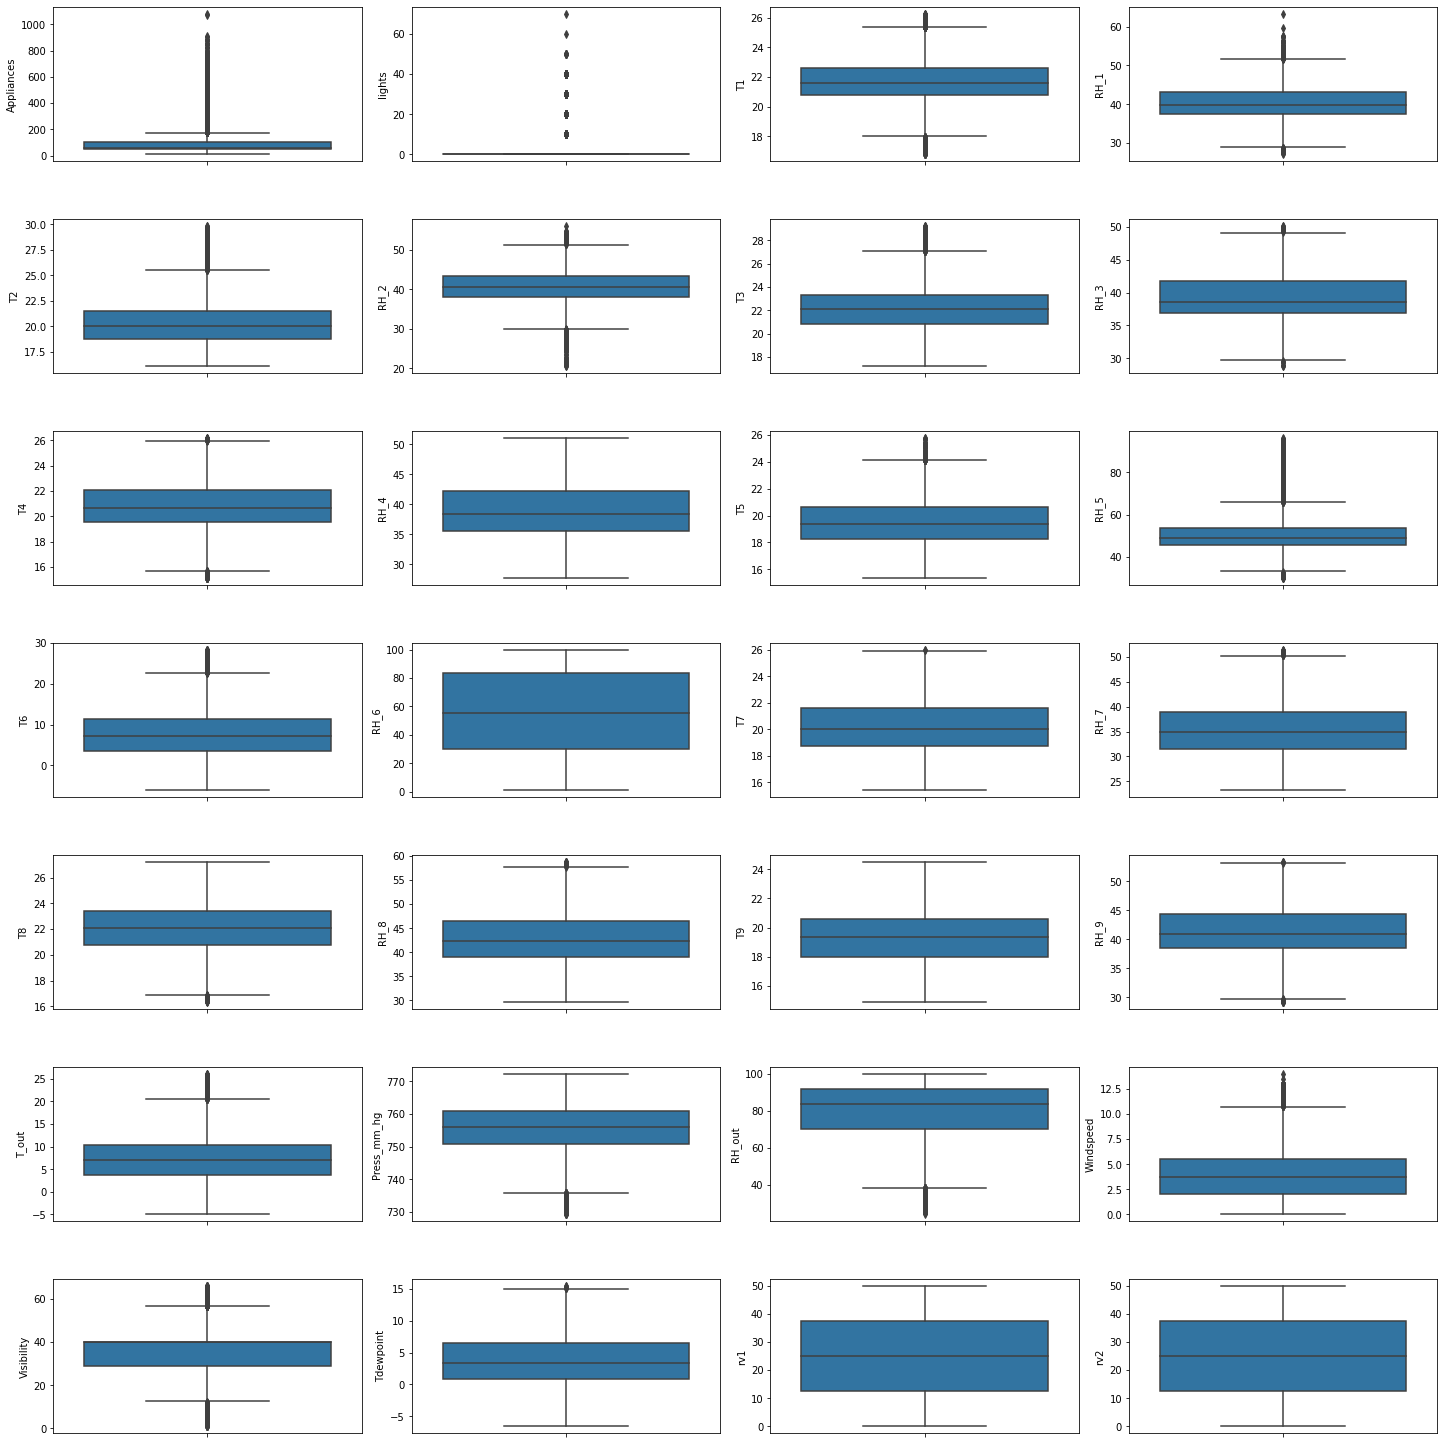

In [30]:
fig, ax = plt.subplots(ncols = 4, nrows = 7, figsize = (20,20))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['hour','month','year','day']).items():
    if col != 'type':
        sns.boxplot(y = col, data = data.drop(columns=['hour','month','year','day']), ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

In [31]:
def impute(value):
    if value<=100:
        return 'low energy'
    else:
        return 'high energy'

In [32]:
data['Appliances']=data['Appliances'].apply(impute)

In [33]:
data['Appliances'].value_counts()

low energy     15502
high energy     4233
Name: Appliances, dtype: int64

In [34]:
def imputer(value):
    if value<=30:
        return 'less lights'
    else:
        return 'more lights'

In [35]:
data['lights']=data['lights'].apply(imputer)

In [36]:
data['lights'].value_counts()

less lights    19647
more lights       88
Name: lights, dtype: int64

In [37]:
pd.value_counts(data['lights'])

less lights    19647
more lights       88
Name: lights, dtype: int64

# Bivariate Plots

C:\Users\User\AppData\Local\Temp/ipykernel_15024/2825182494.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


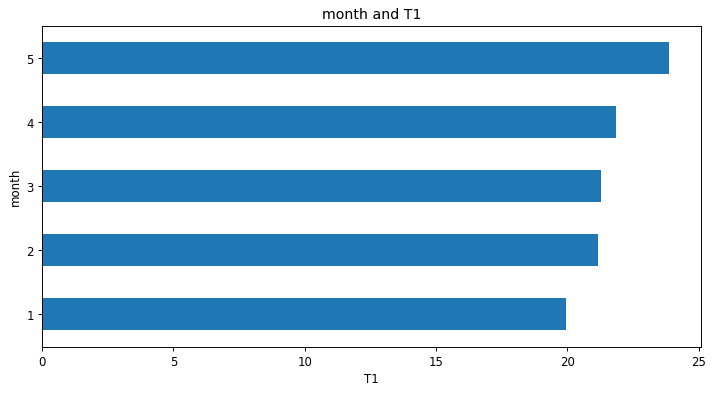

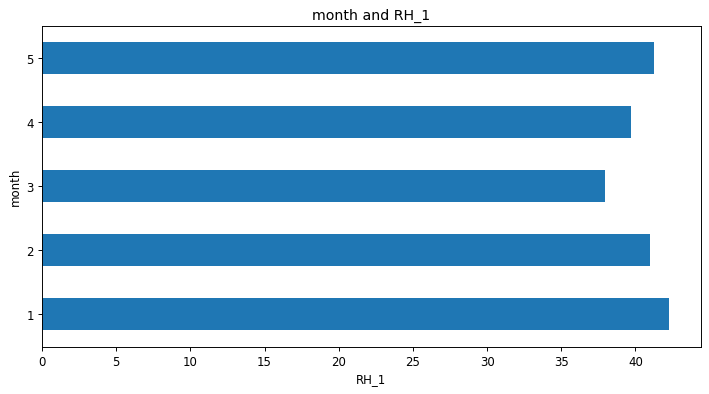

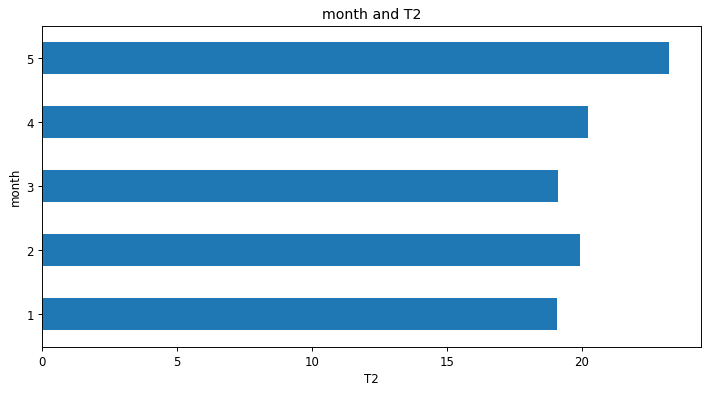

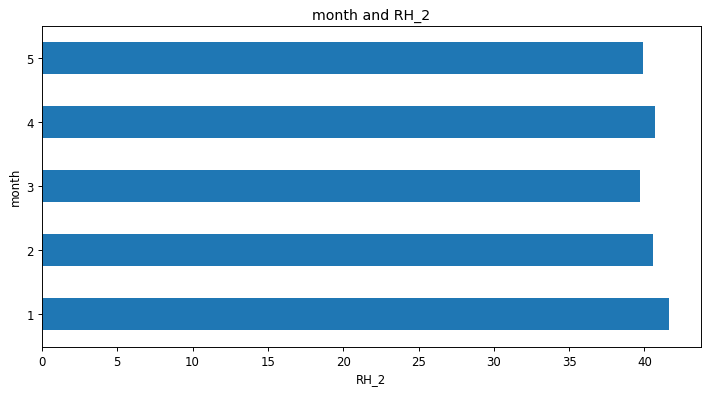

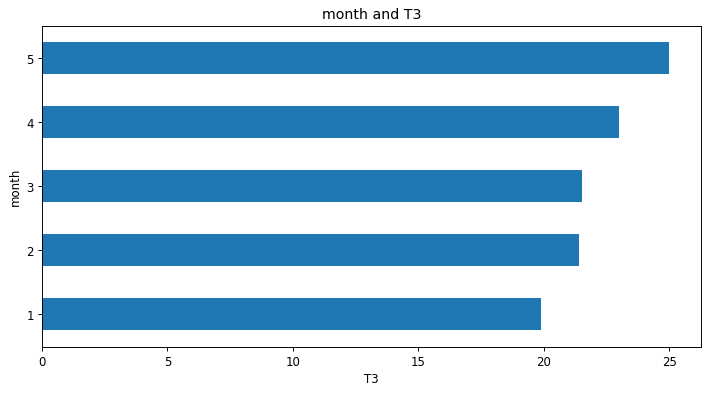

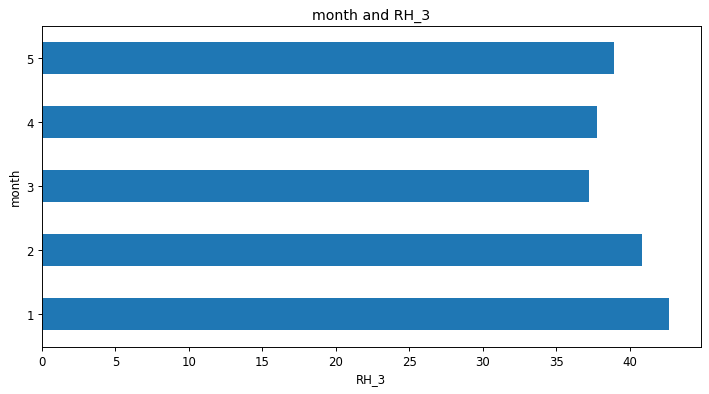

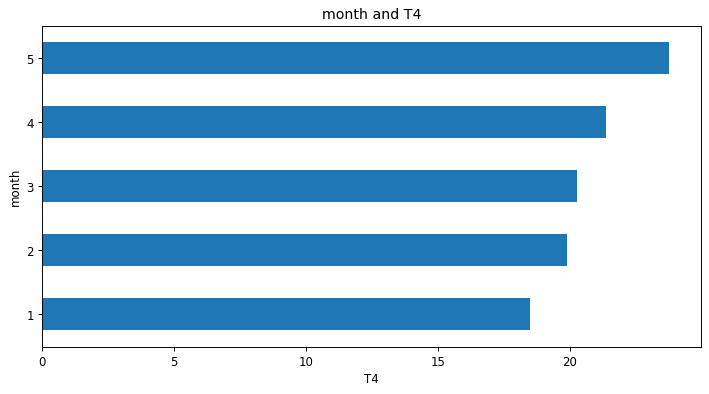

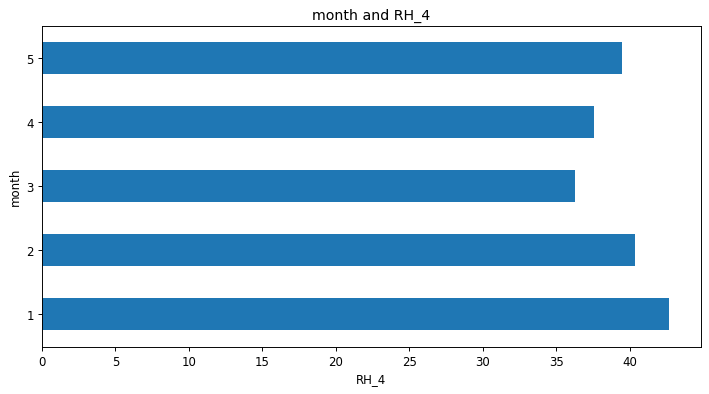

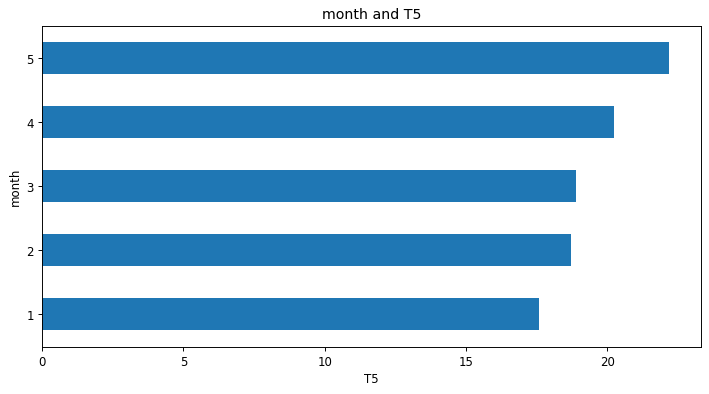

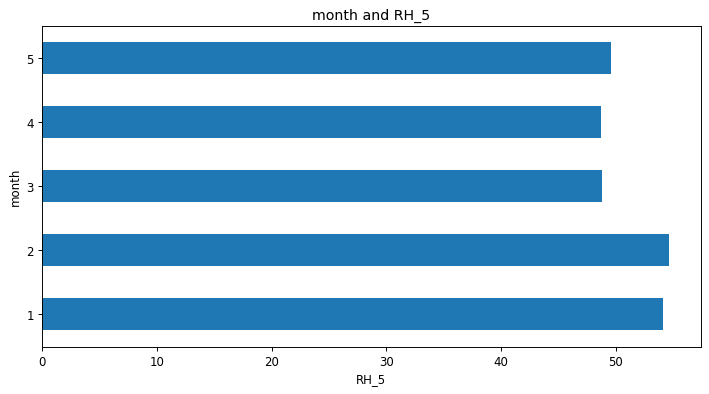

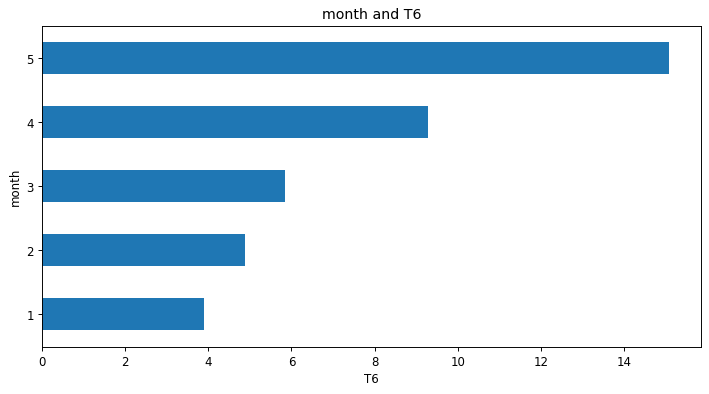

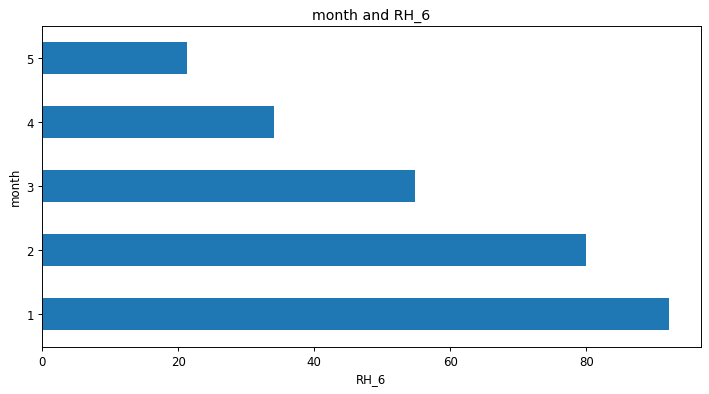

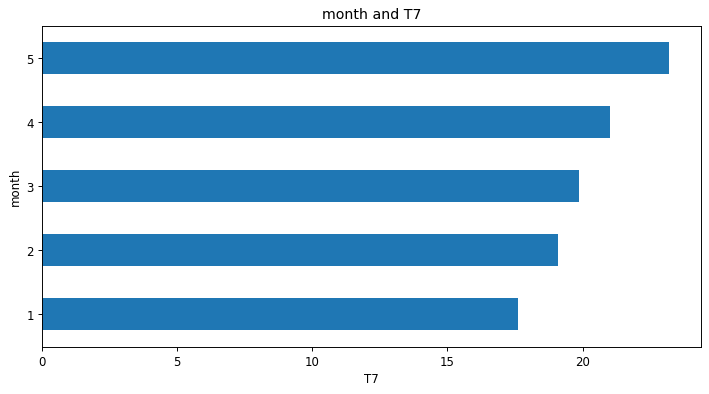

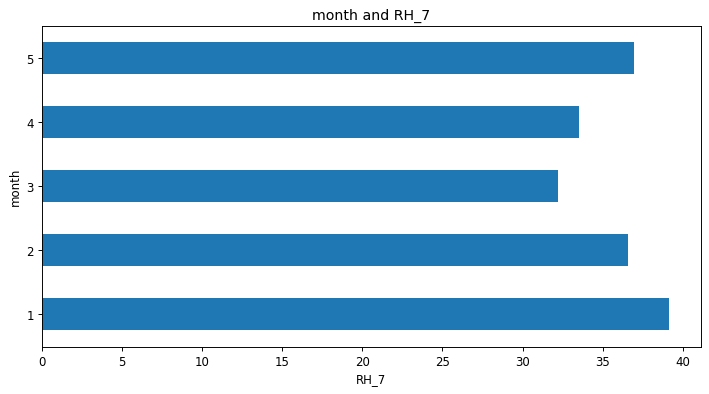

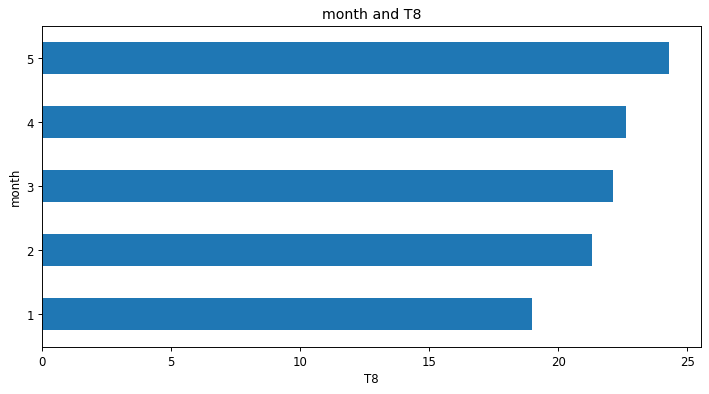

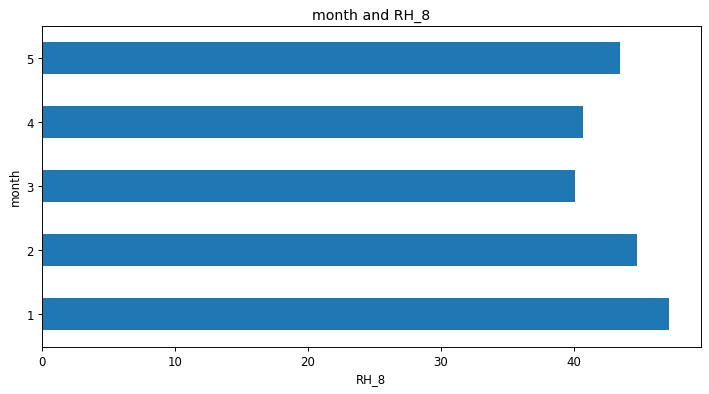

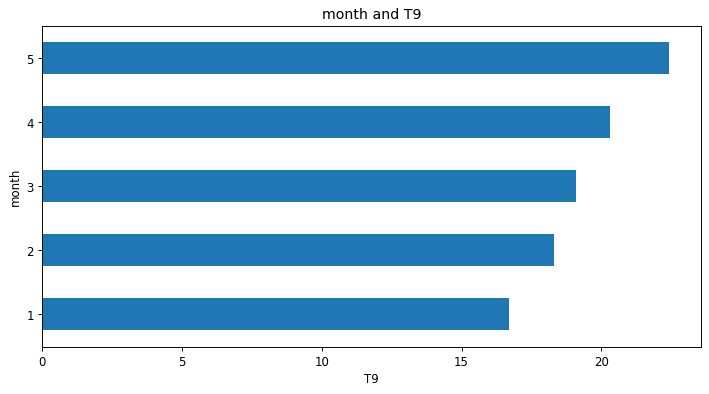

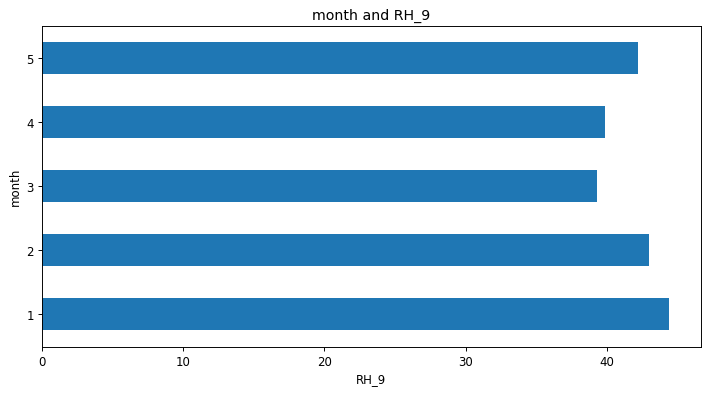

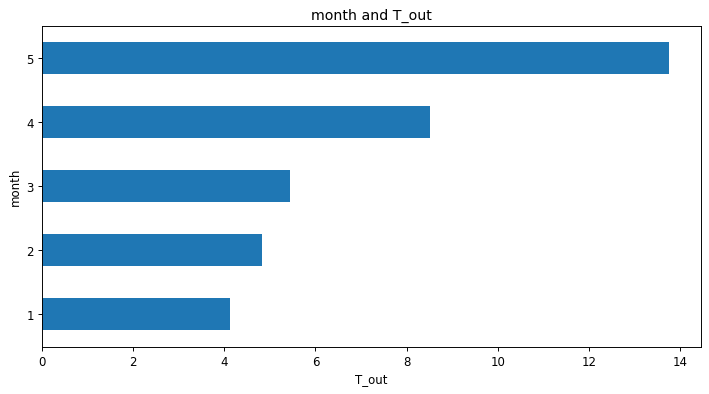

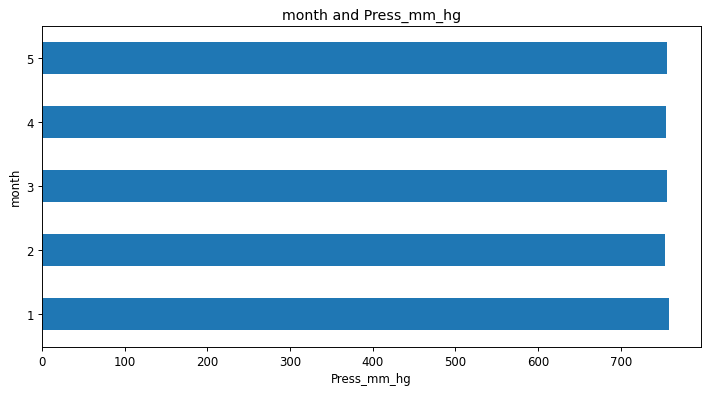

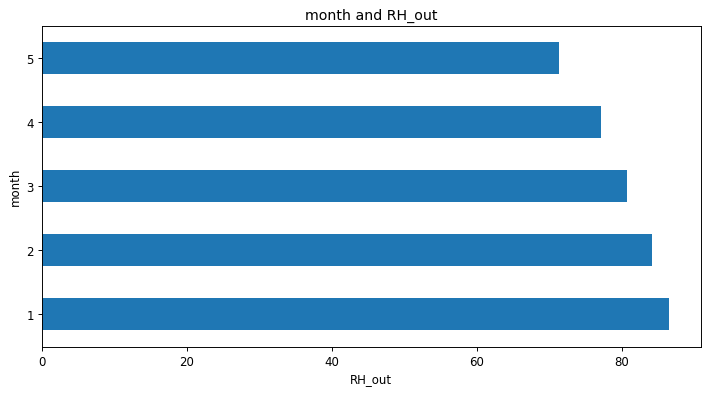

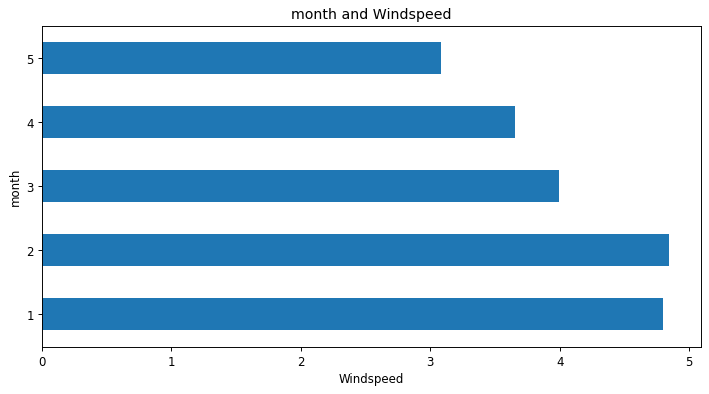

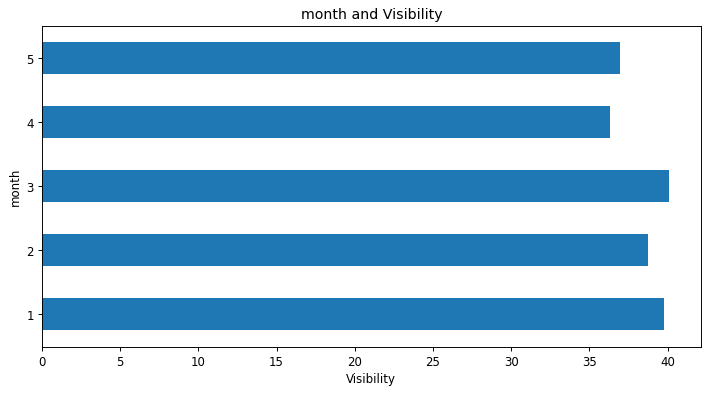

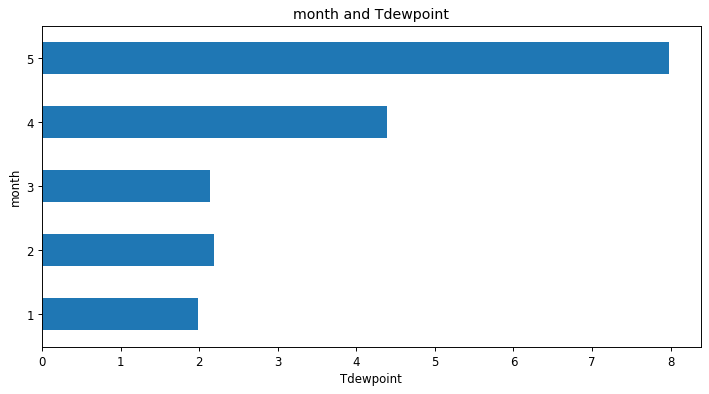

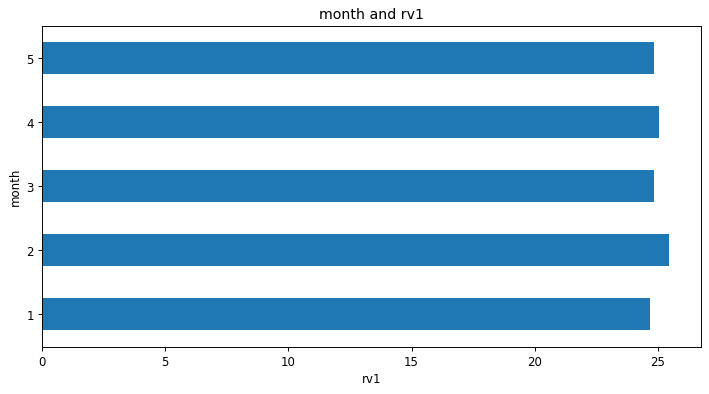

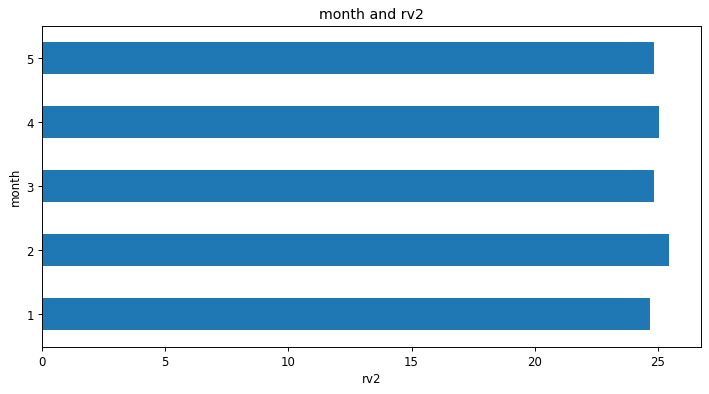

In [38]:
for i in data.drop(columns=['lights','Appliances','year','day','hour','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    data.groupby('month')[i].mean().plot(kind='barh')
    plt.xlabel(i)
    plt.title('month and {}'.format(i))

C:\Users\User\AppData\Local\Temp/ipykernel_15024/279704693.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


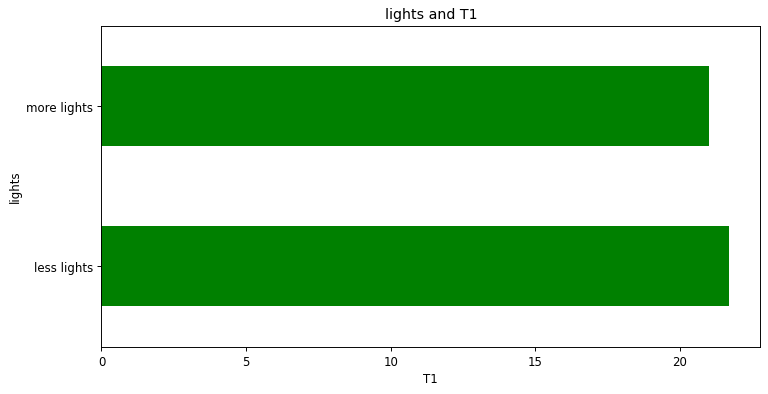

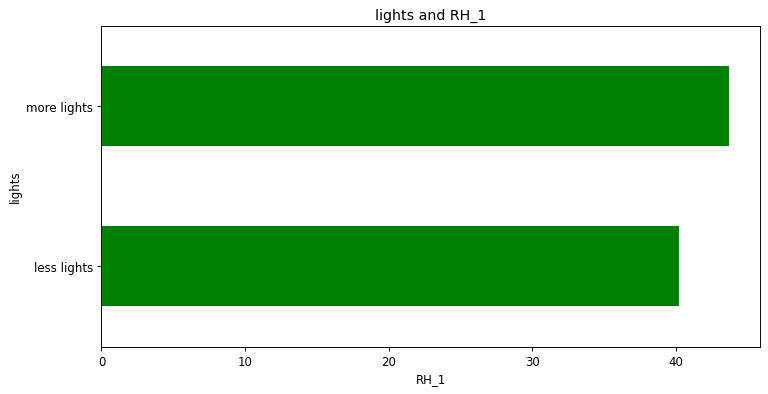

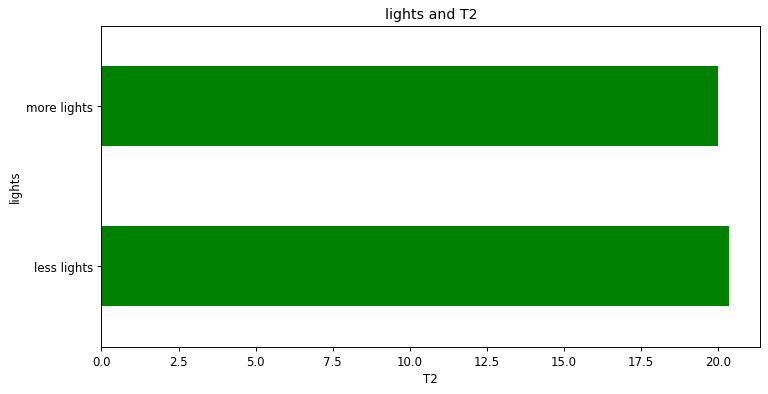

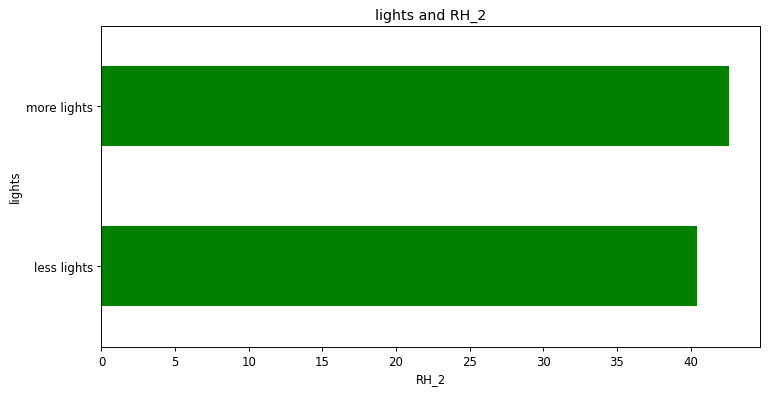

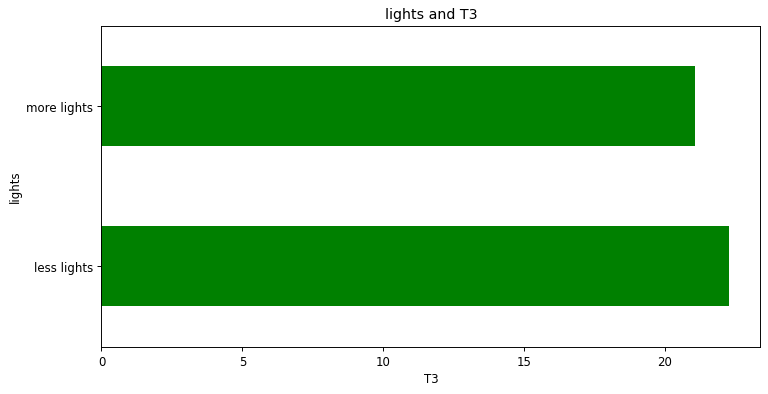

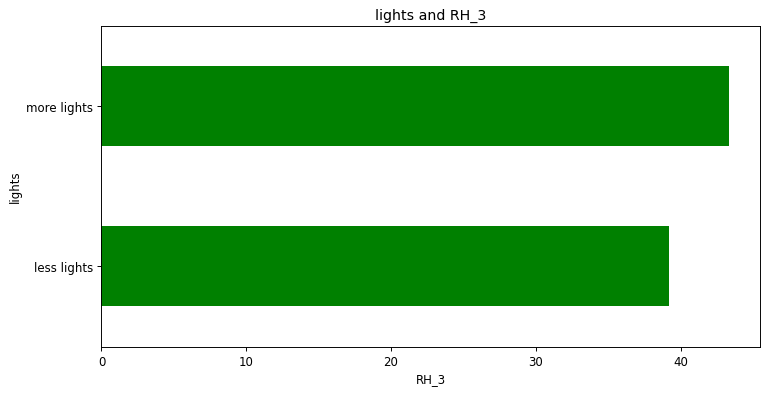

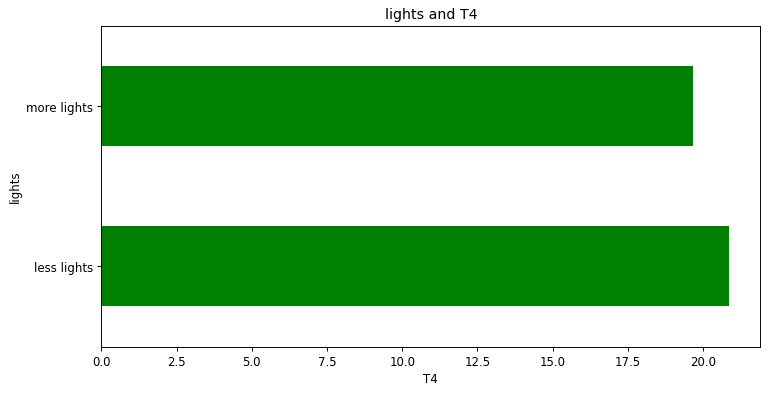

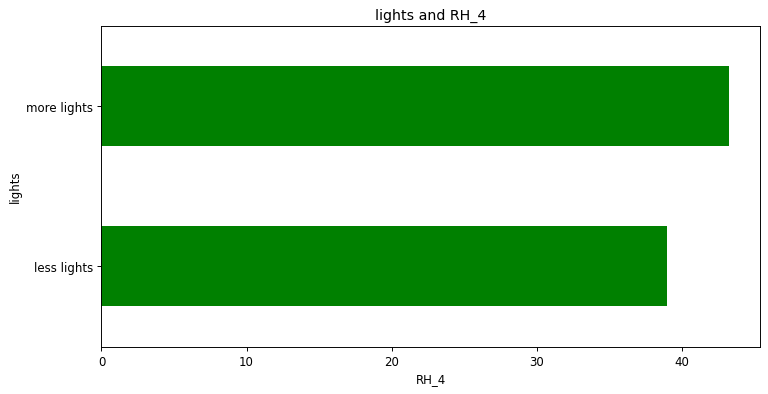

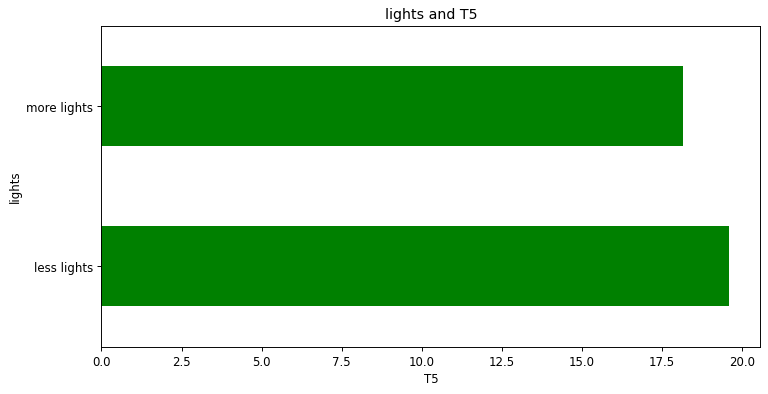

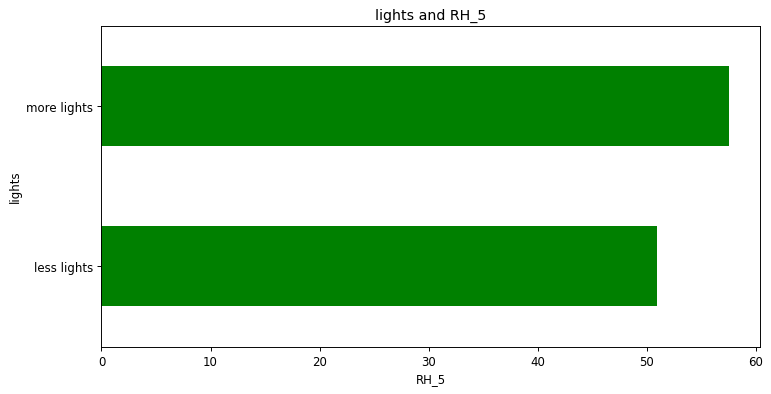

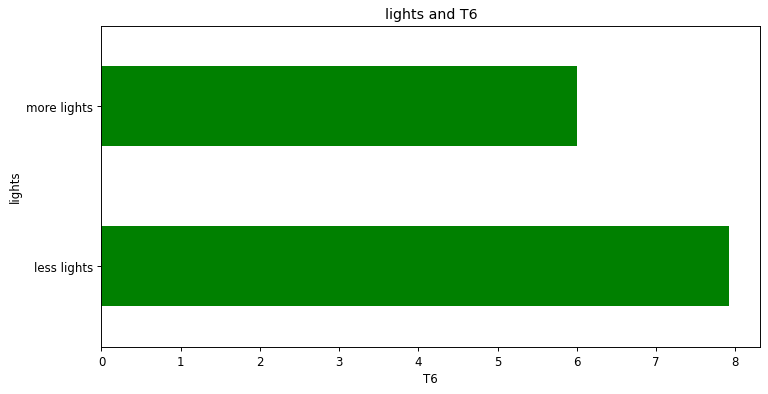

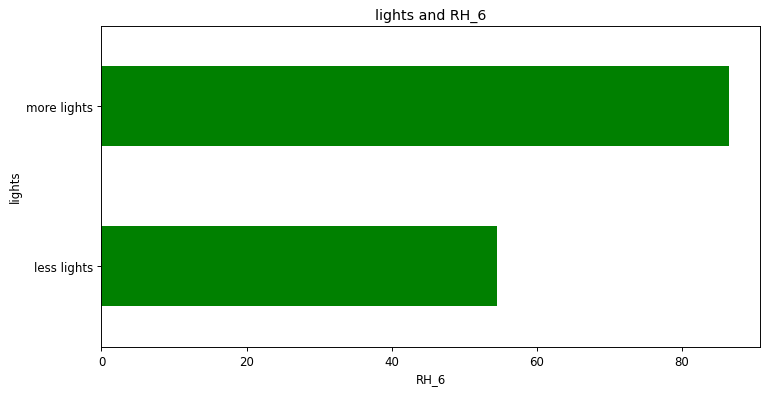

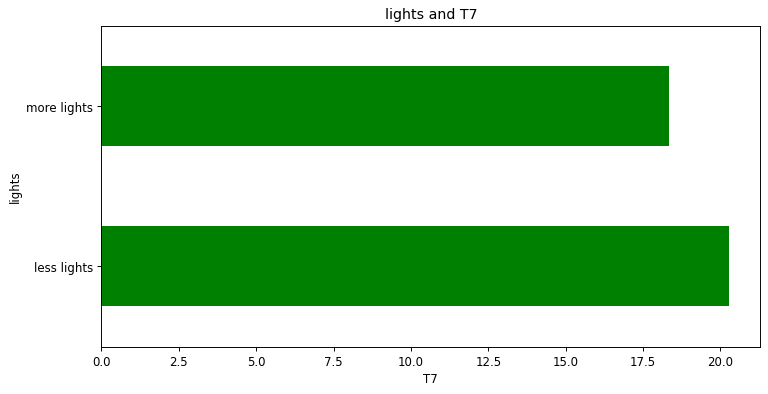

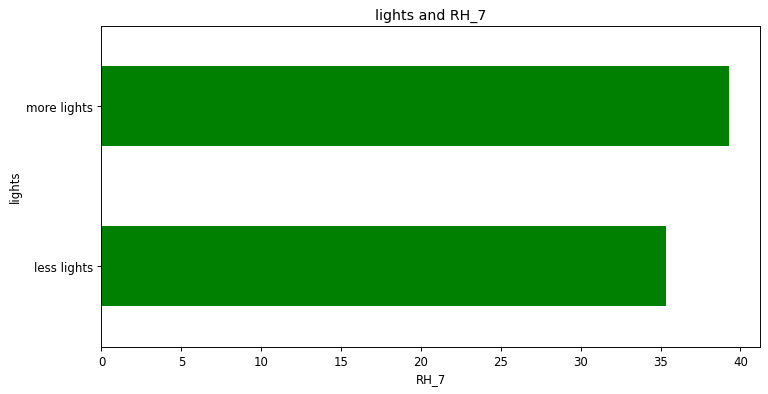

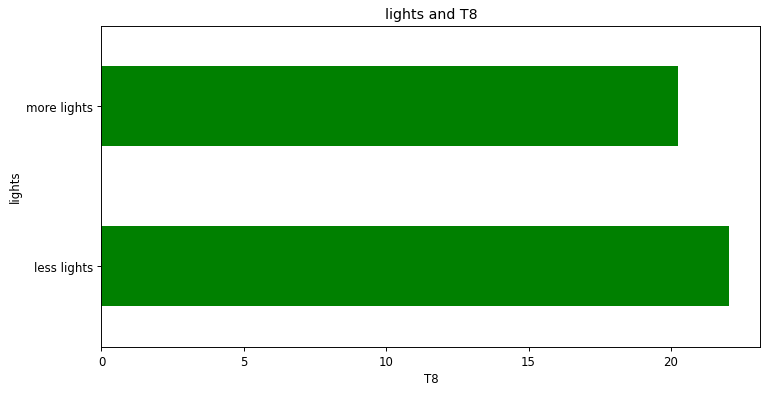

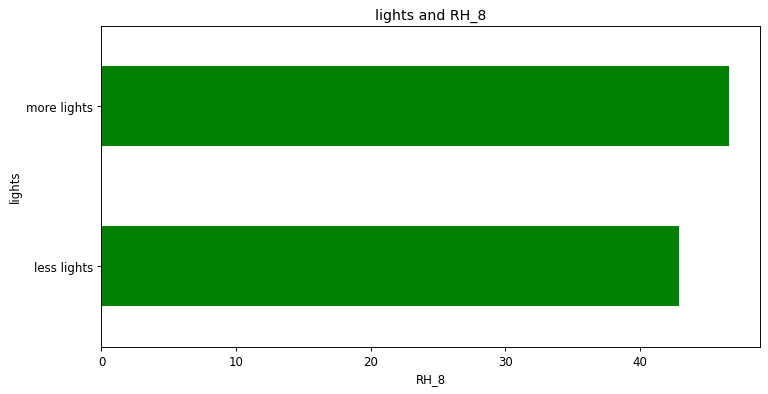

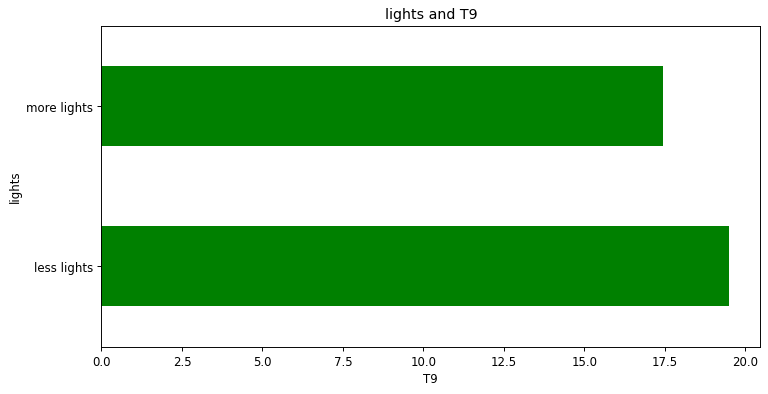

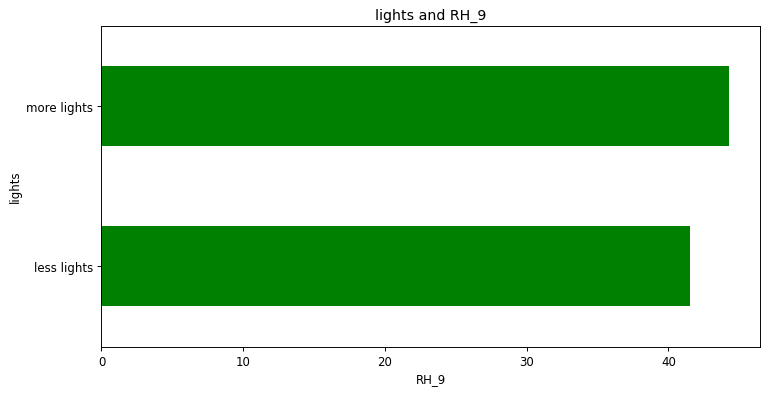

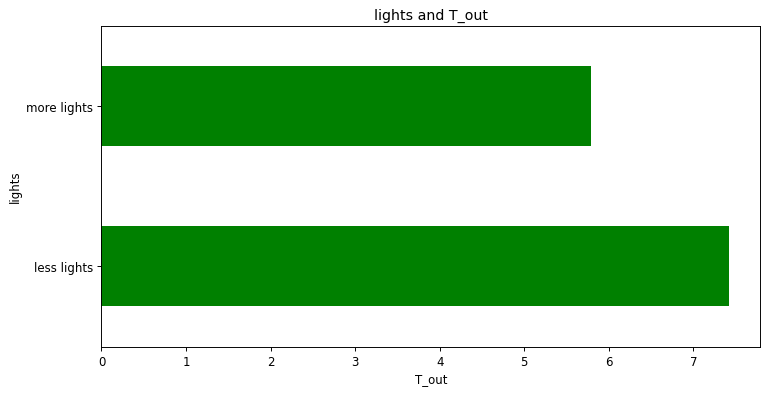

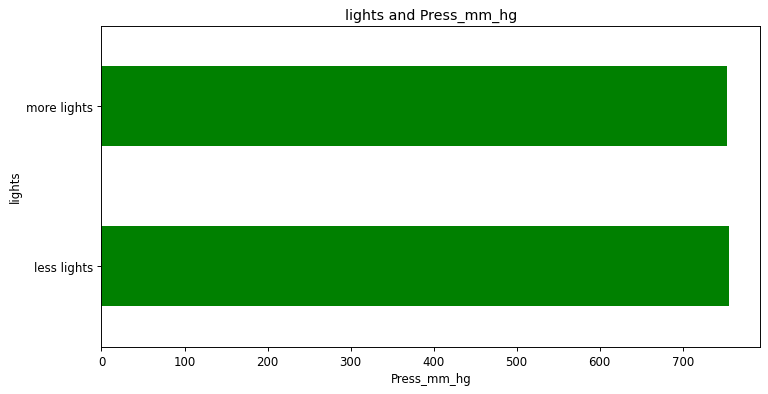

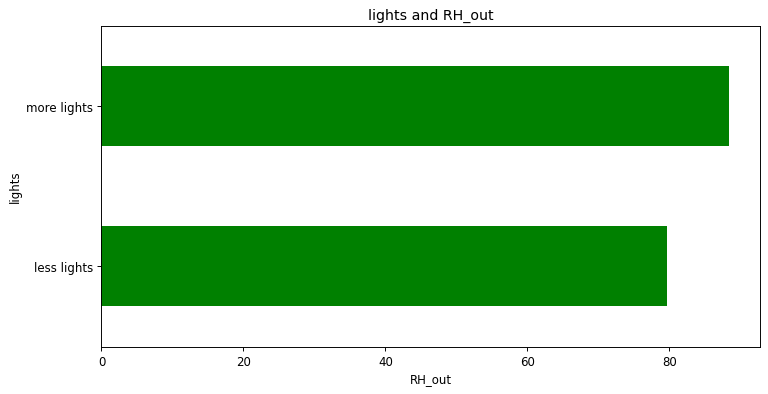

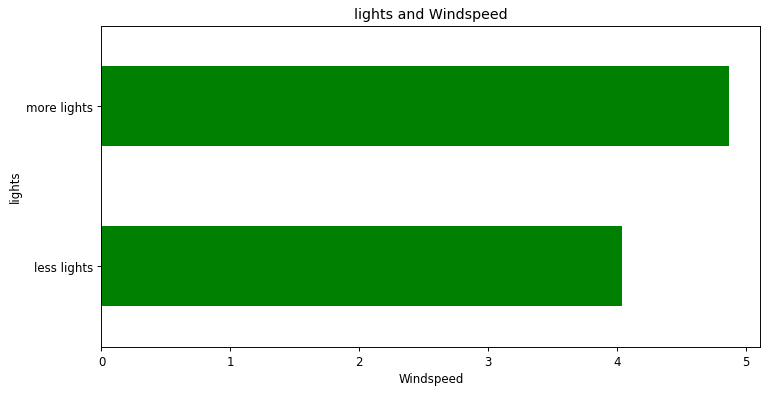

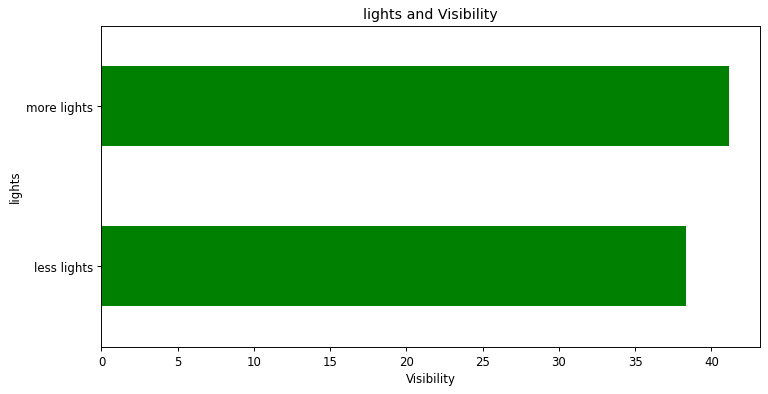

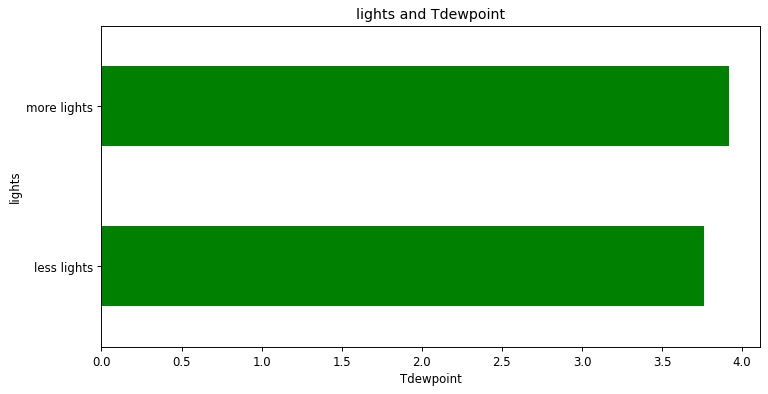

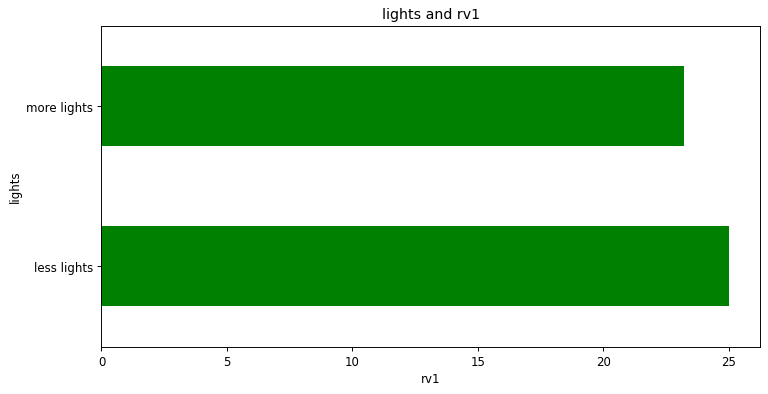

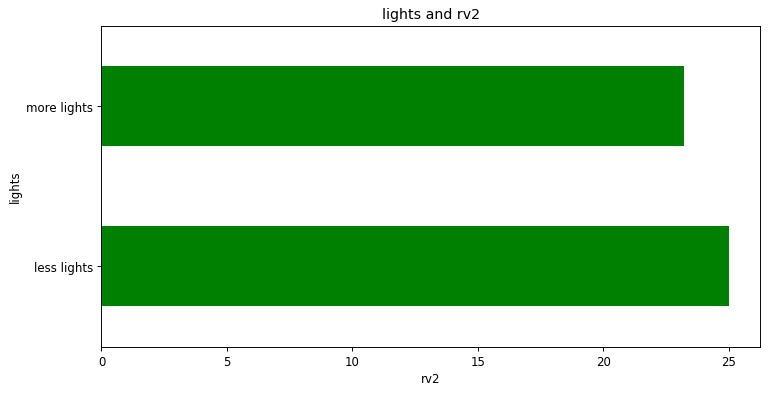

In [39]:
for i in data.drop(columns=['lights','Appliances','year','day','hour','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    data.groupby('lights')[i].mean().plot(kind='barh',color='green')
    plt.xlabel(i)
    plt.title('lights and {}'.format(i))

C:\Users\User\AppData\Local\Temp/ipykernel_15024/3560328074.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


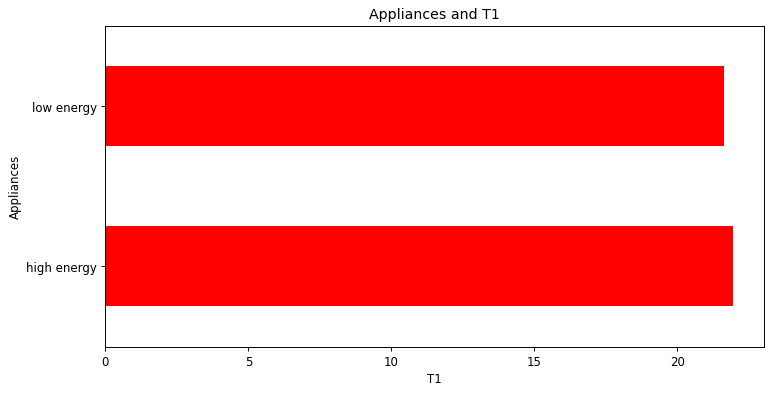

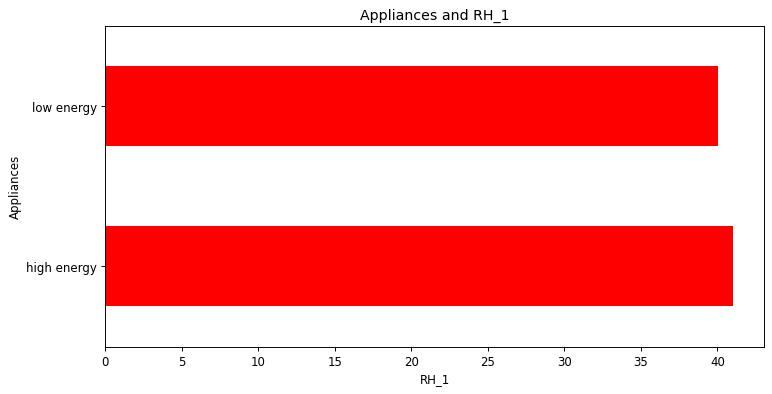

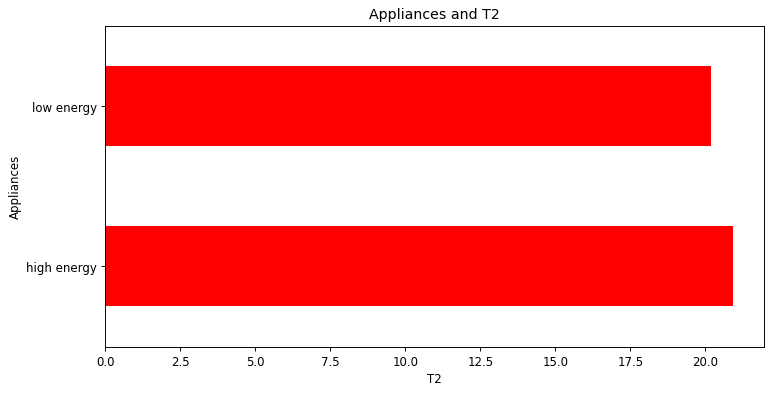

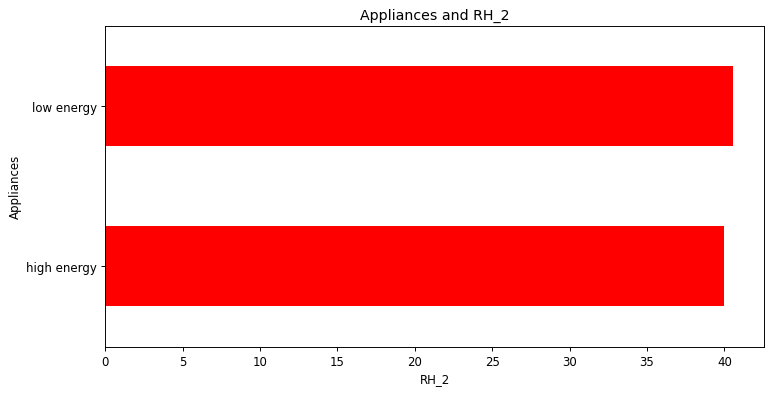

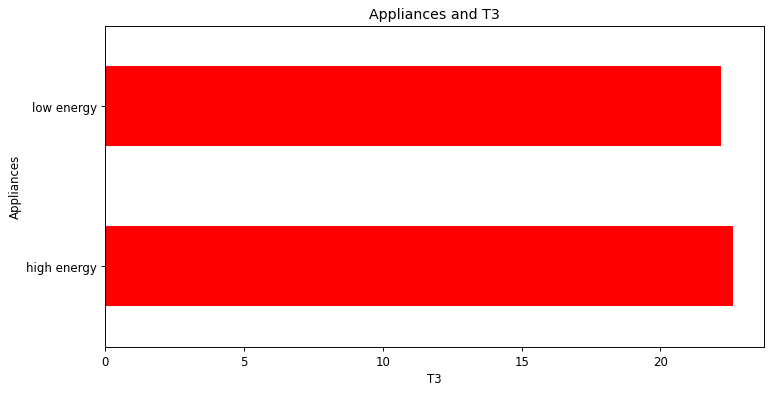

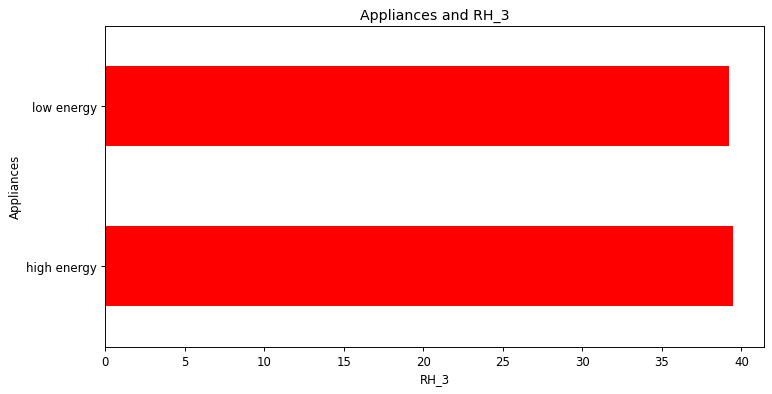

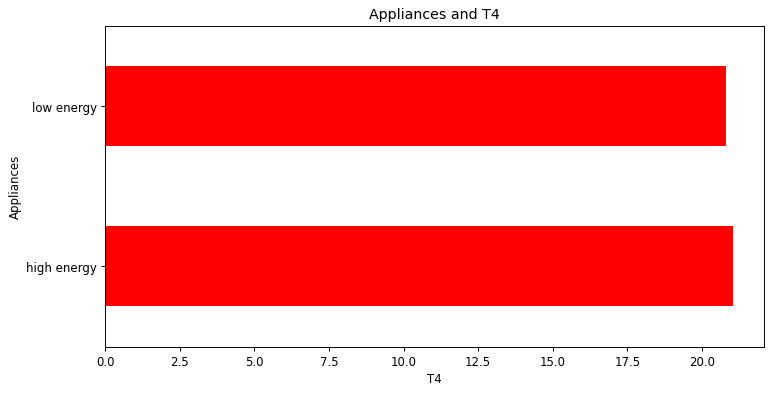

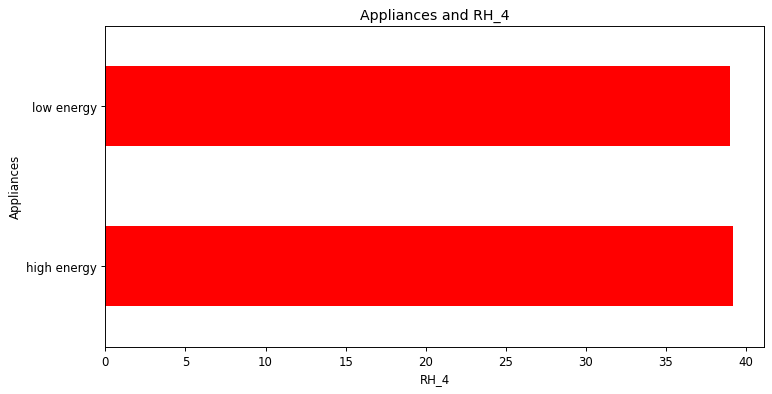

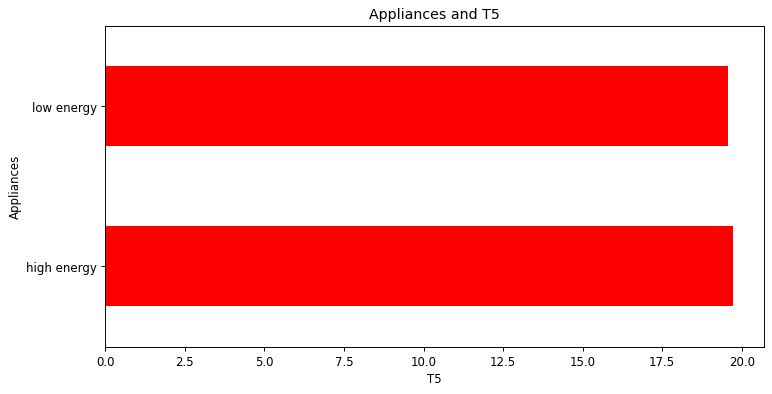

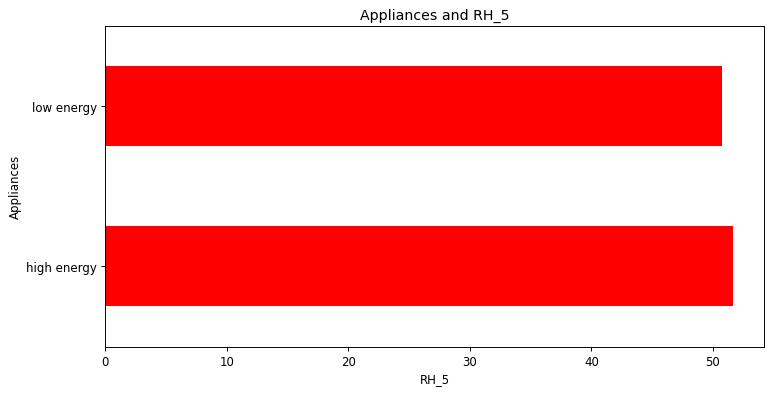

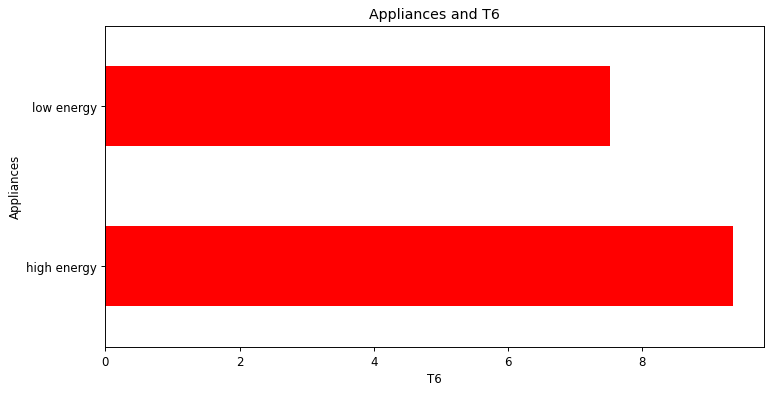

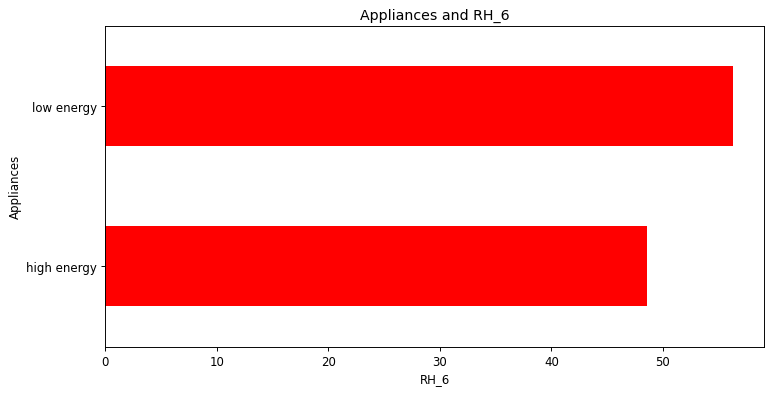

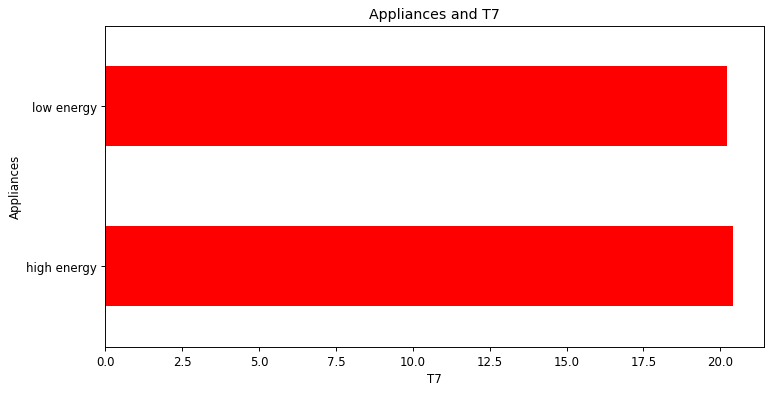

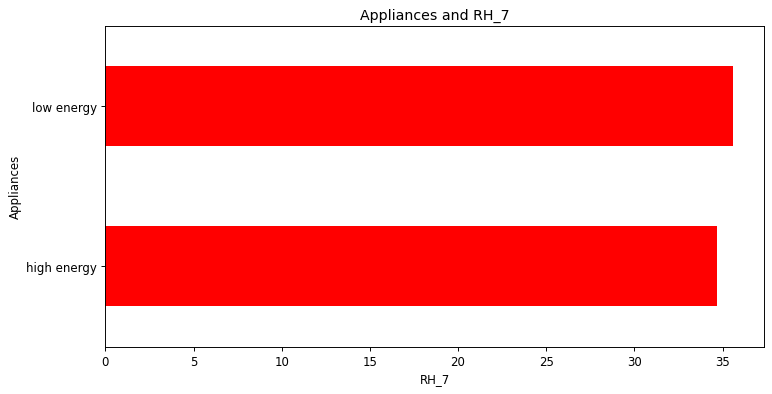

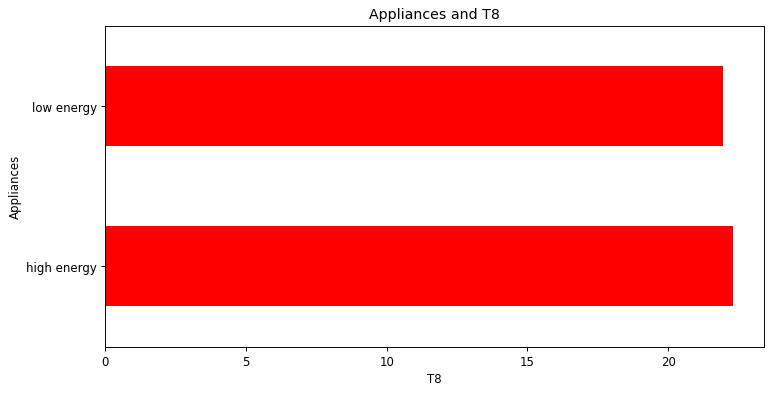

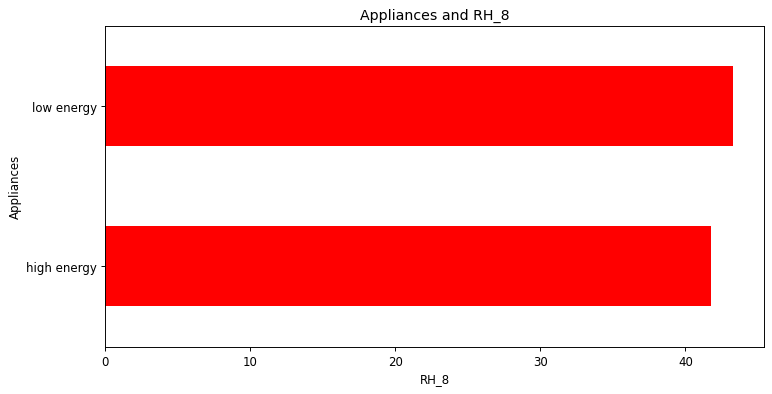

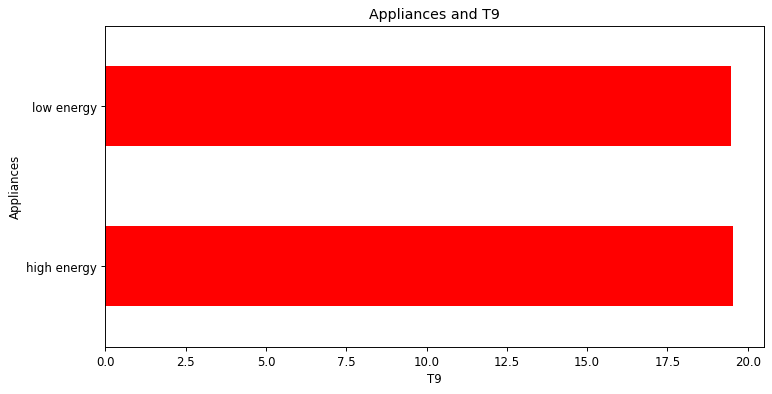

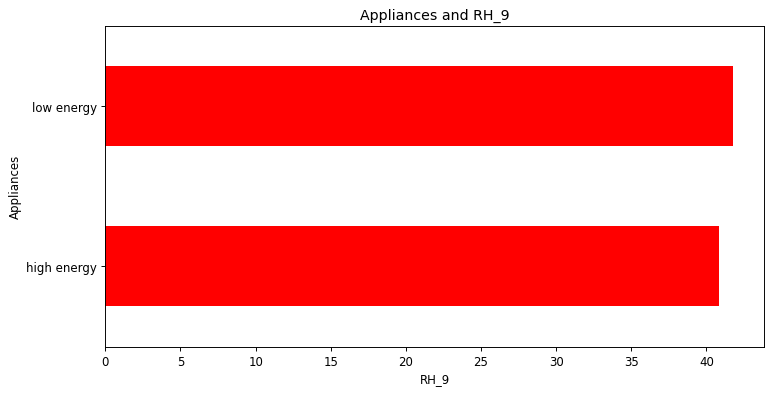

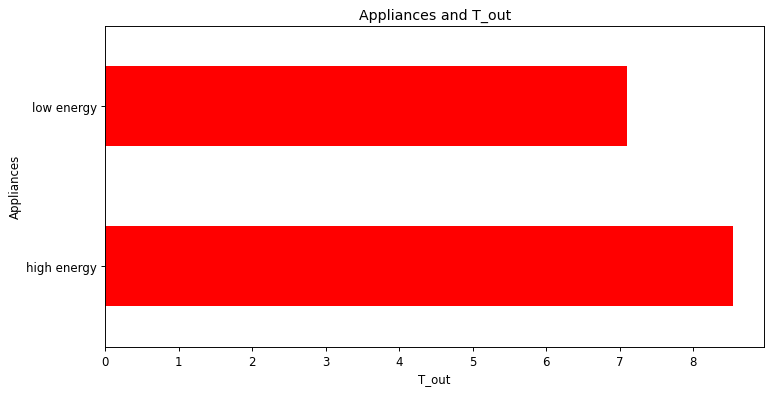

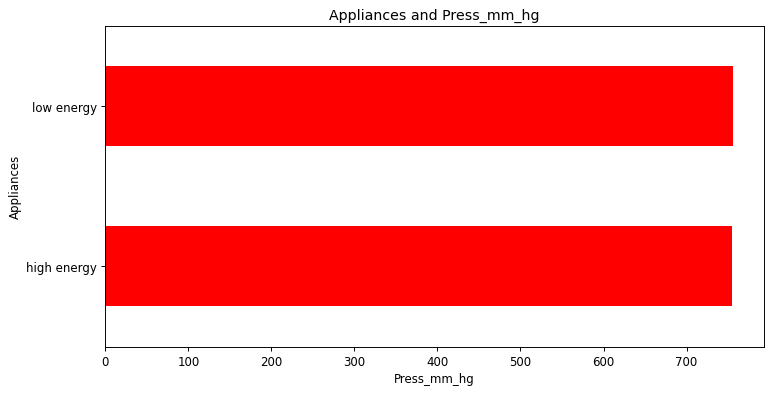

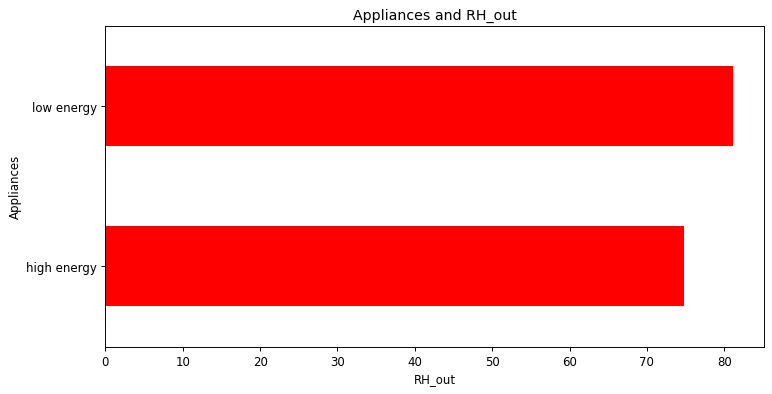

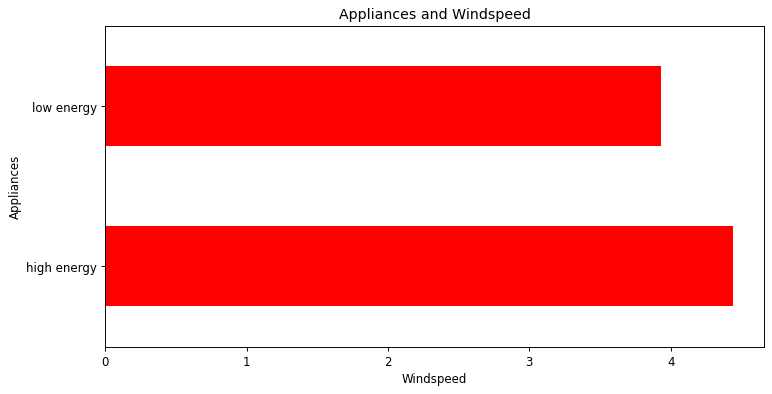

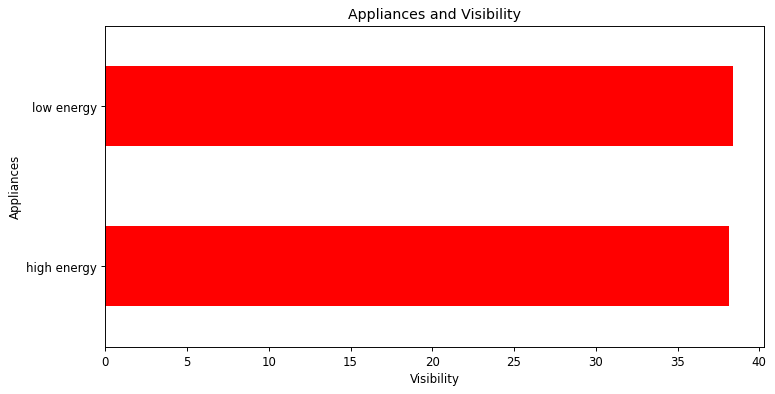

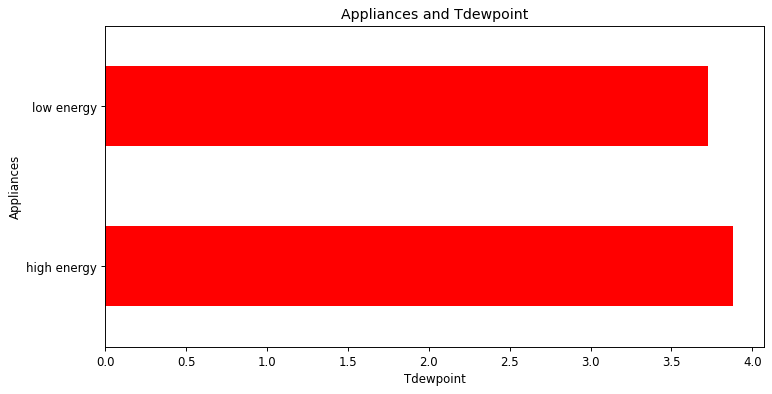

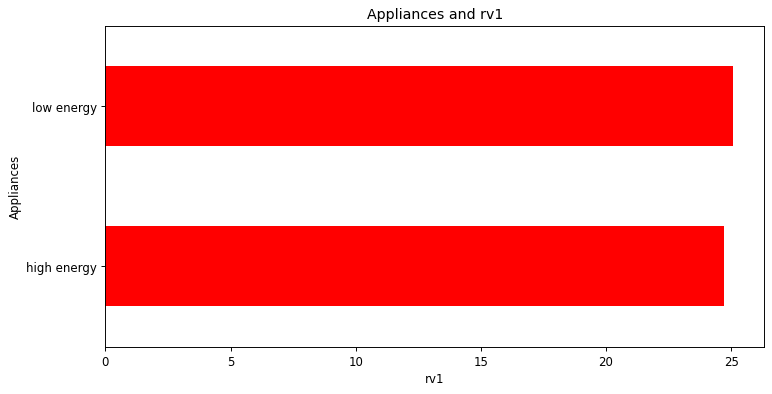

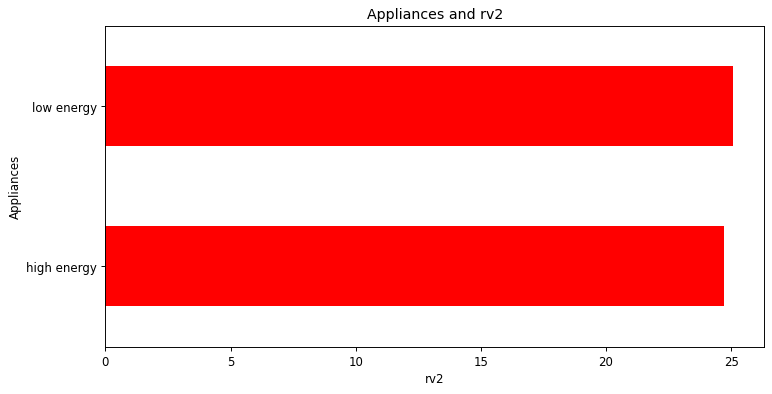

In [40]:
for i in data.drop(columns=['lights','Appliances','year','day','hour','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    data.groupby('Appliances')[i].mean().plot(kind='barh',color='red')
    plt.xlabel(i)
    plt.title('Appliances and {}'.format(i))

# Multivariate plots

C:\Users\User\AppData\Local\Temp/ipykernel_15024/2790927457.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


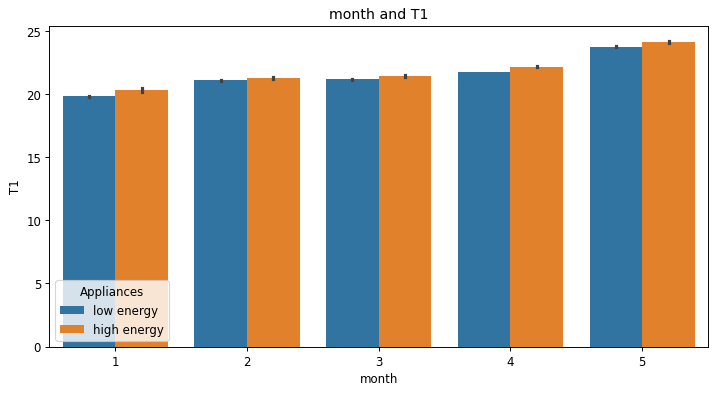

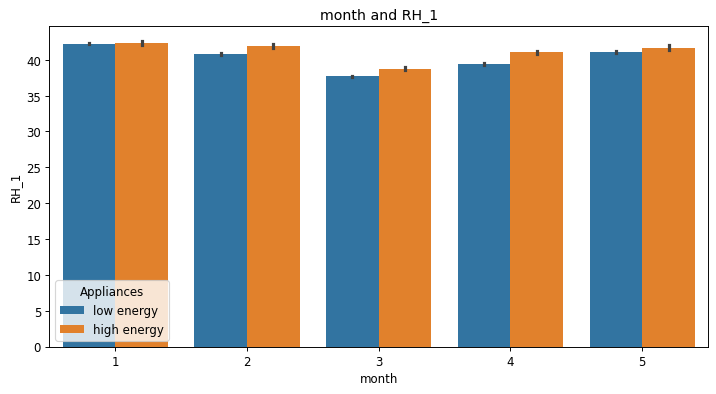

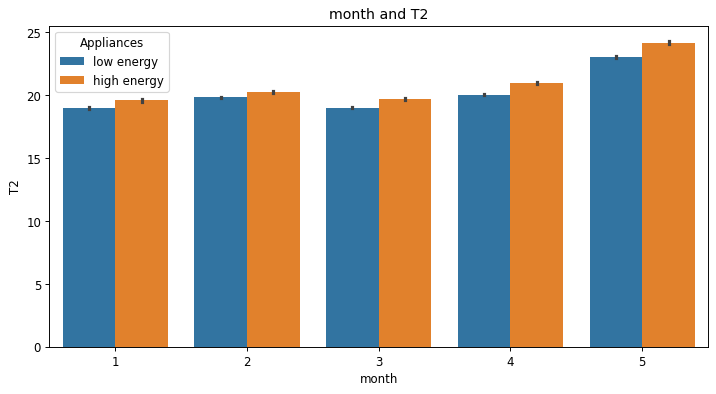

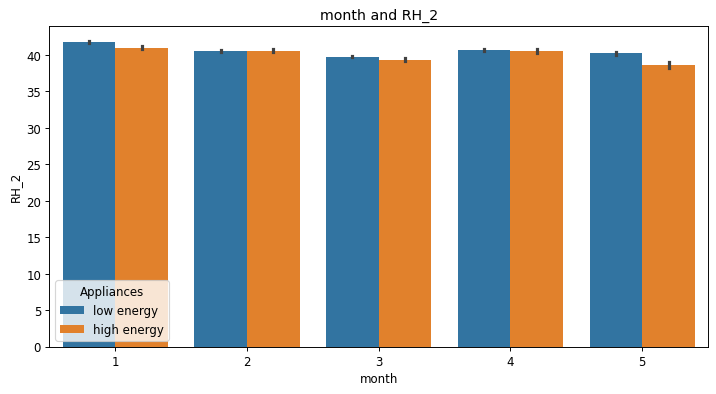

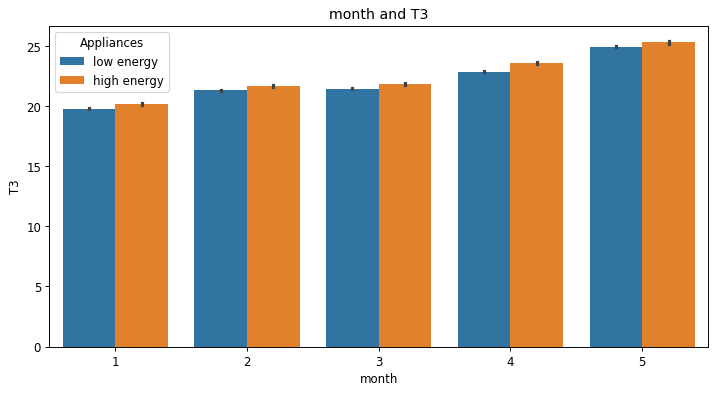

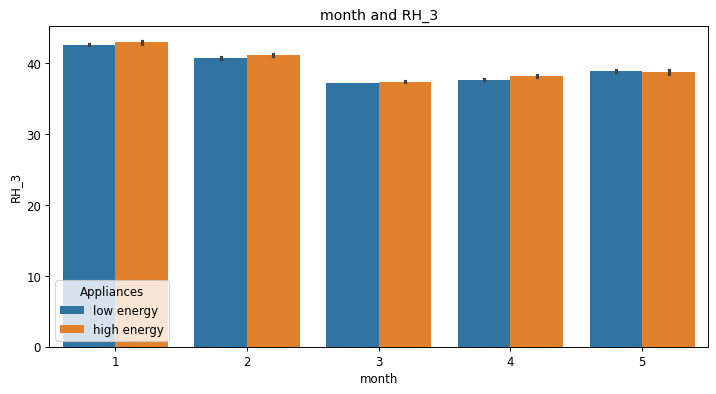

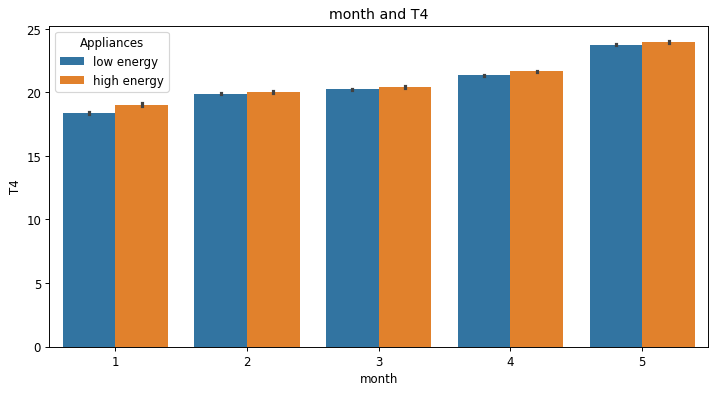

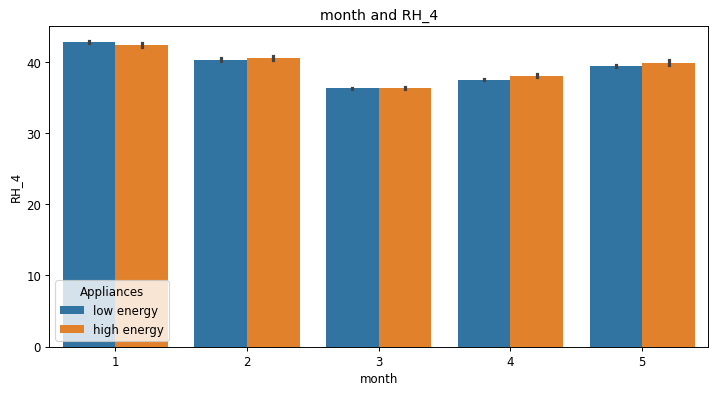

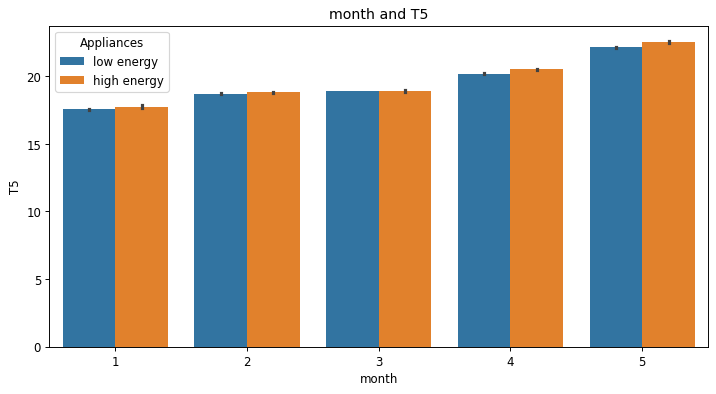

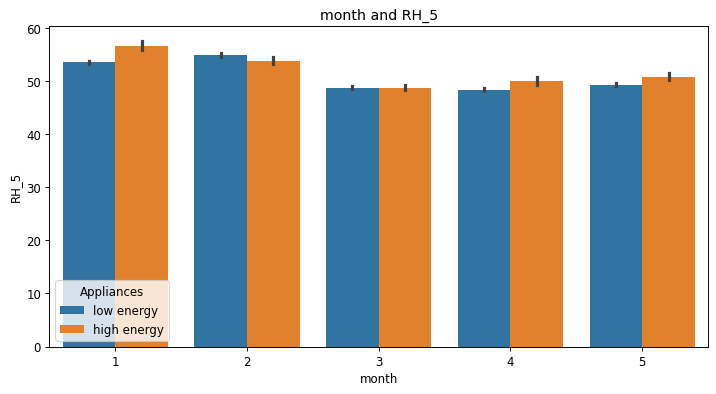

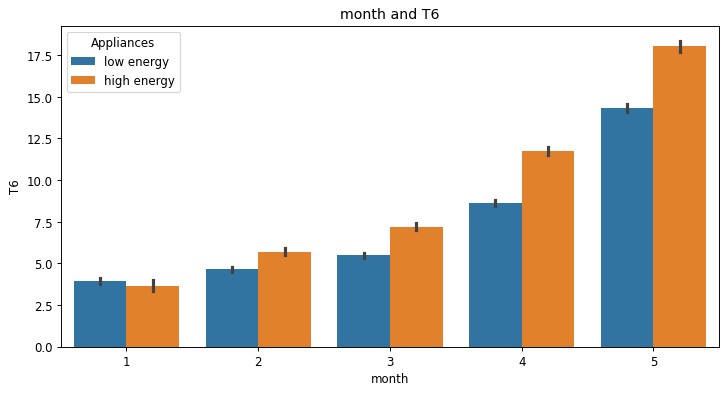

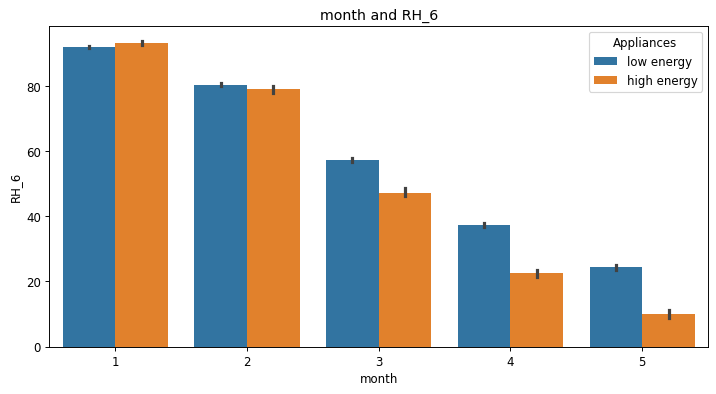

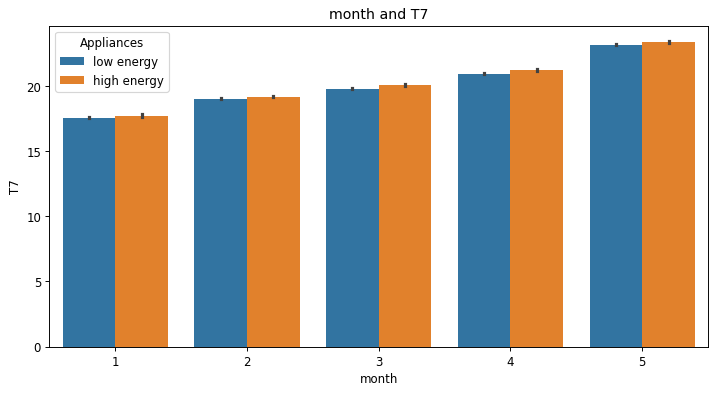

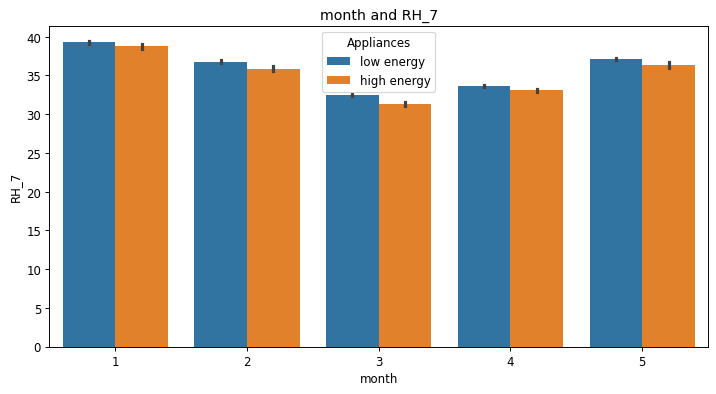

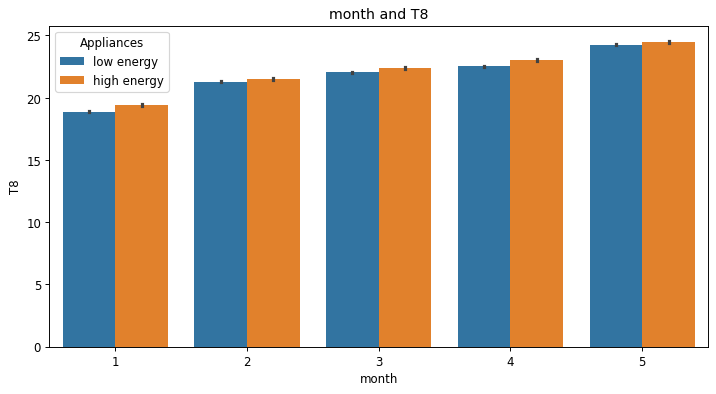

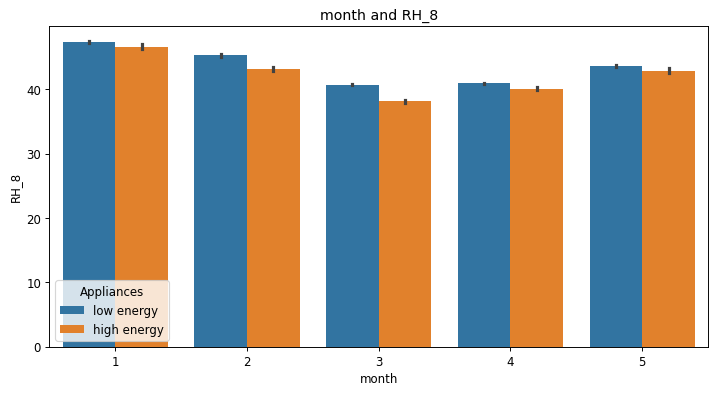

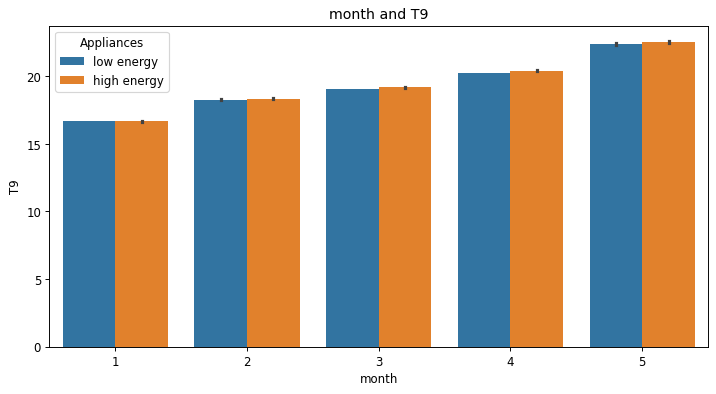

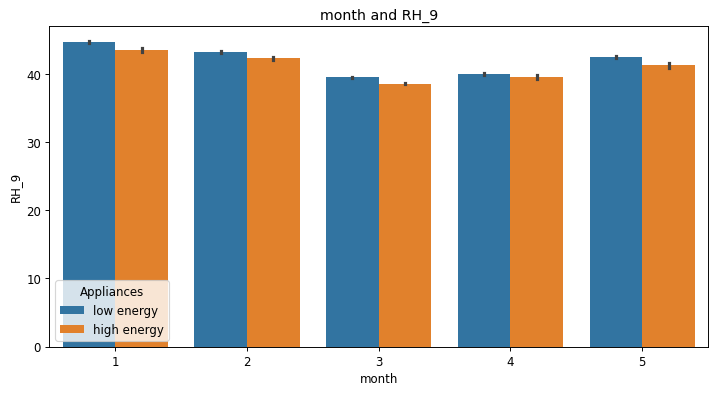

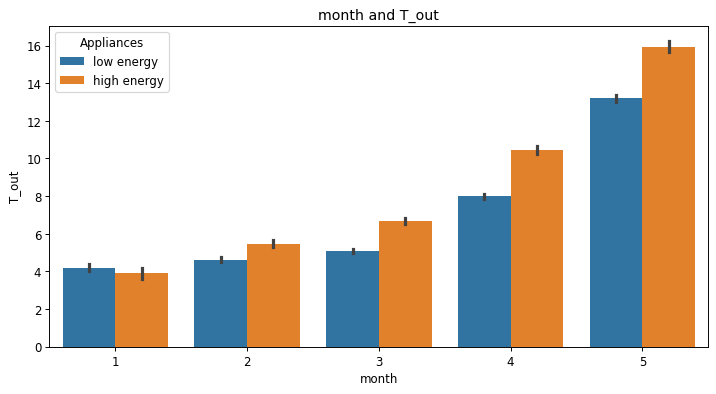

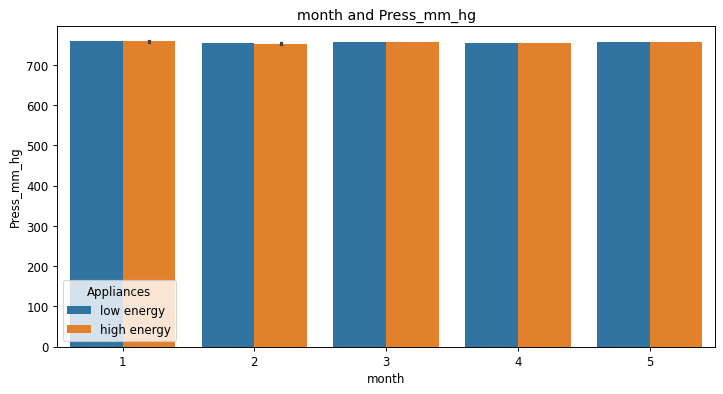

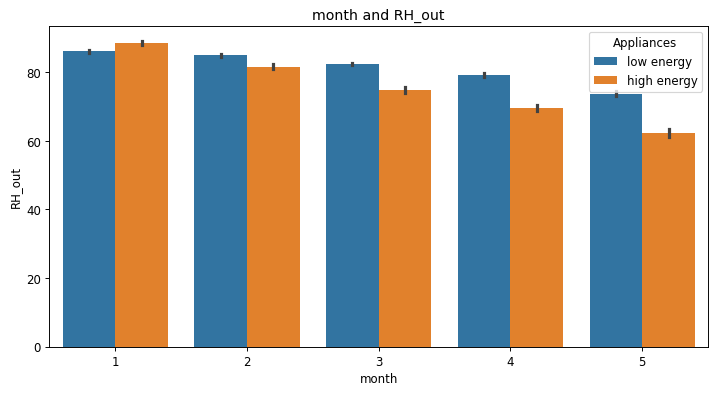

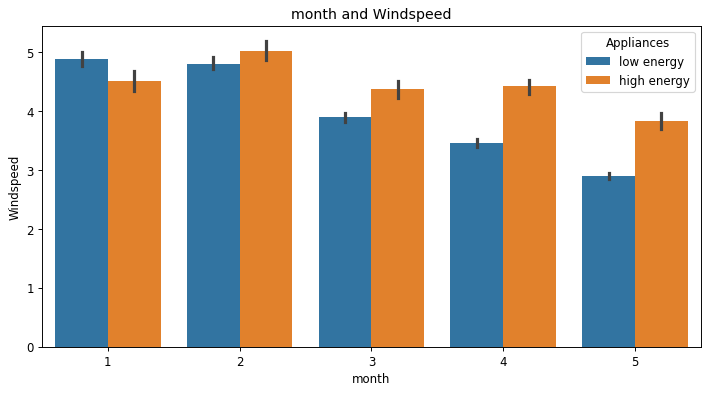

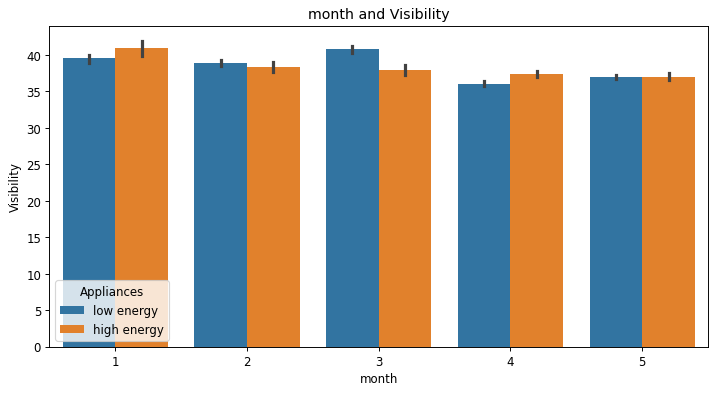

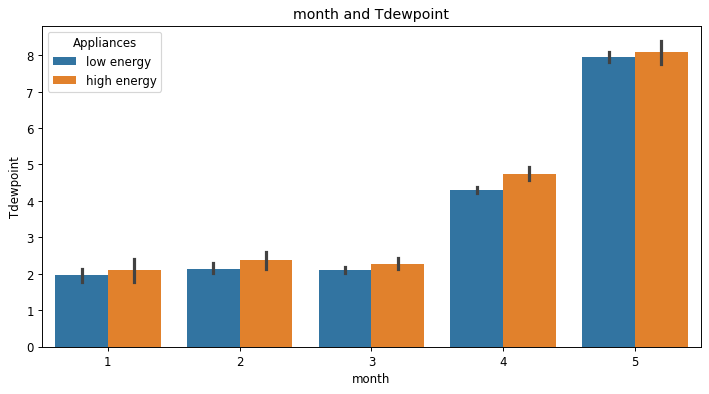

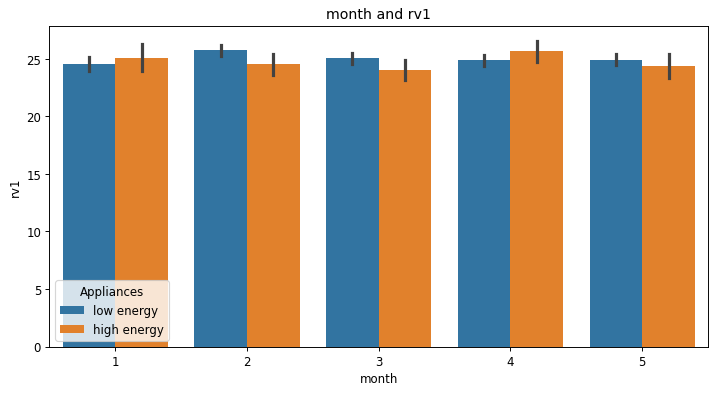

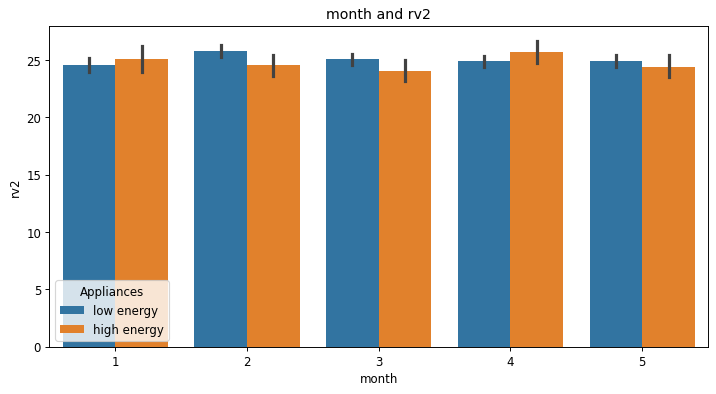

In [41]:
for i in data.drop(columns=['lights','Appliances','year','hour','day','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='month',y=i,hue='Appliances',data=data)
    plt.title('month and {}'.format(i))

C:\Users\User\AppData\Local\Temp/ipykernel_15024/3115308953.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


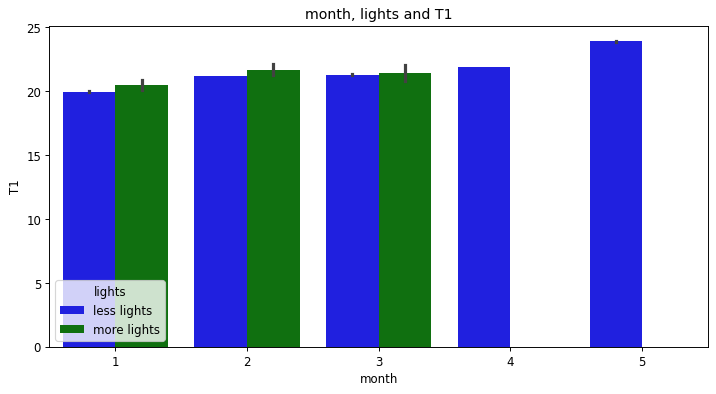

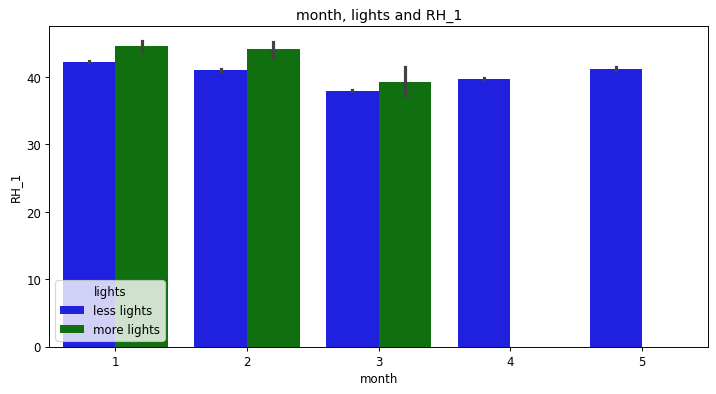

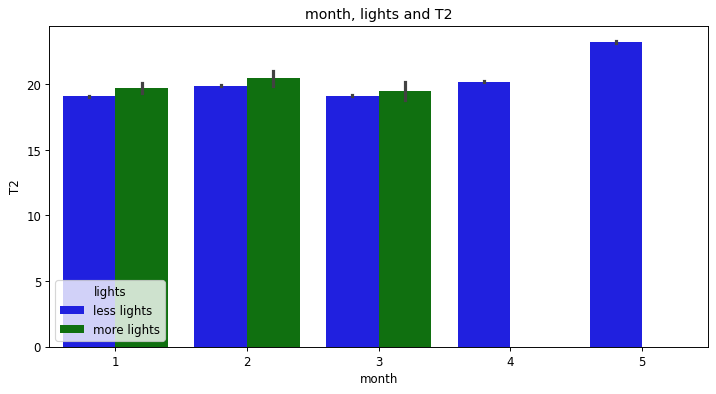

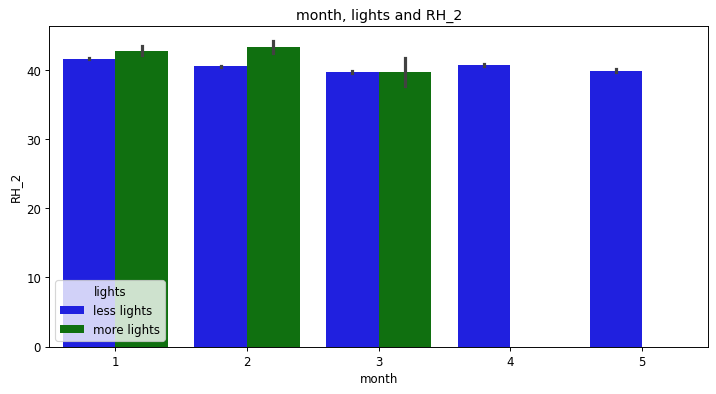

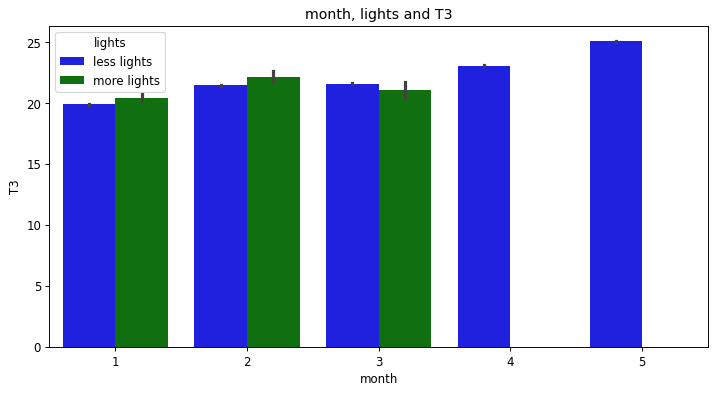

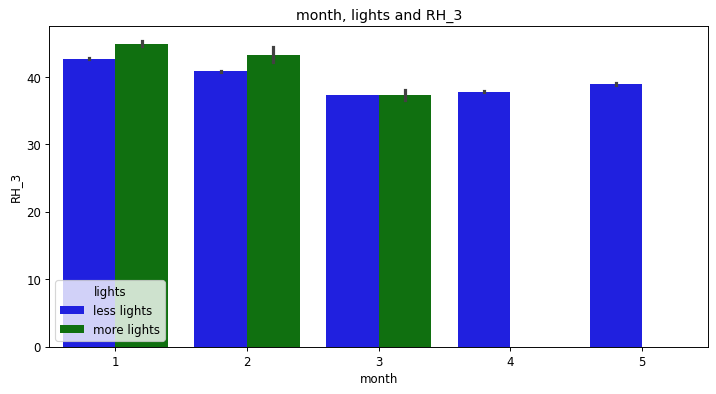

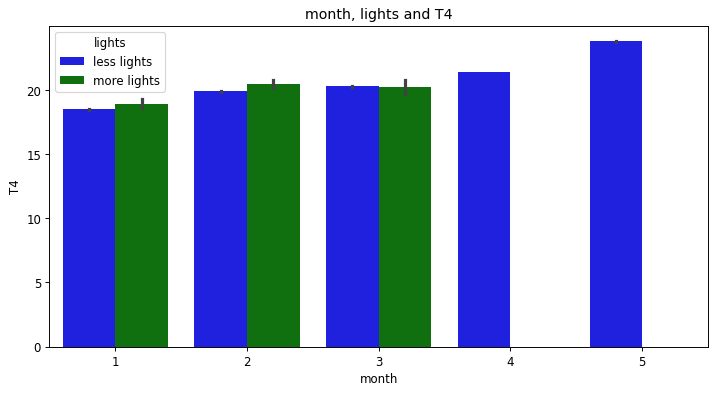

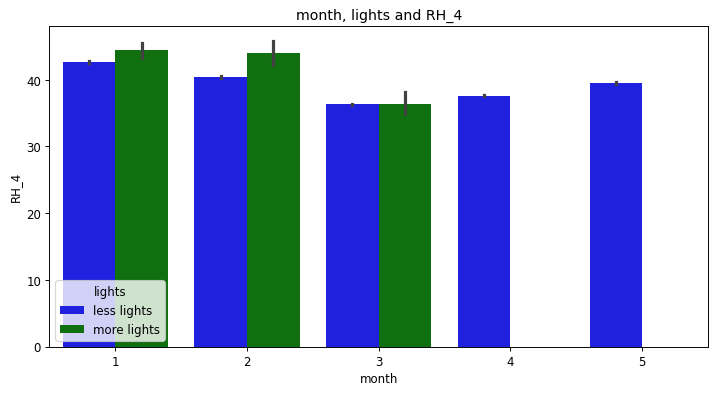

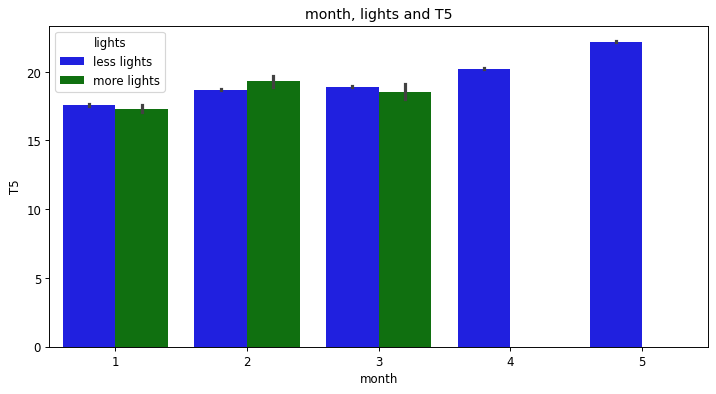

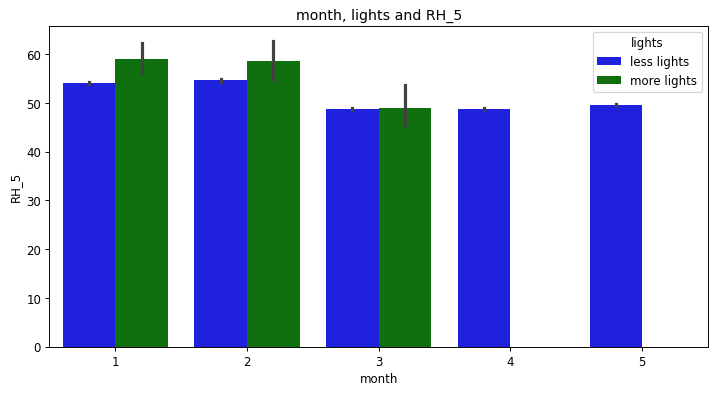

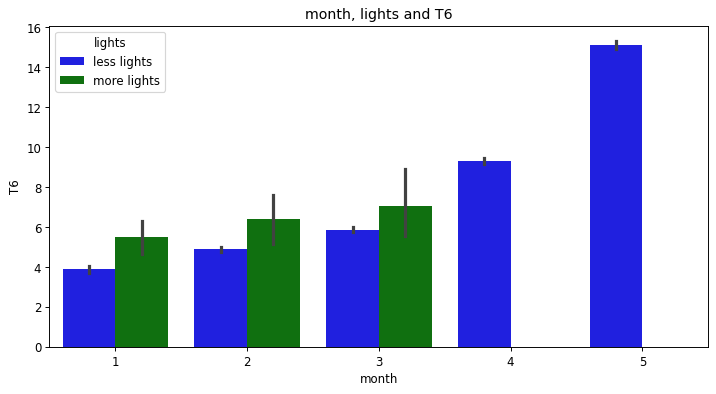

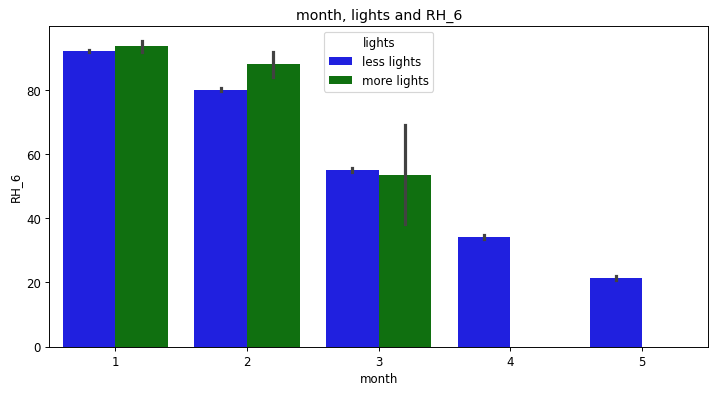

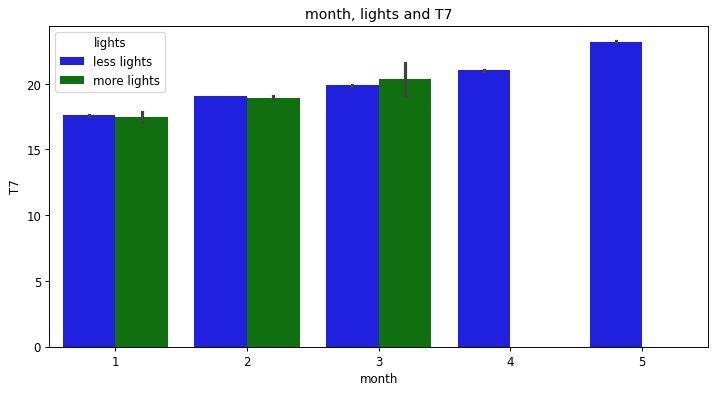

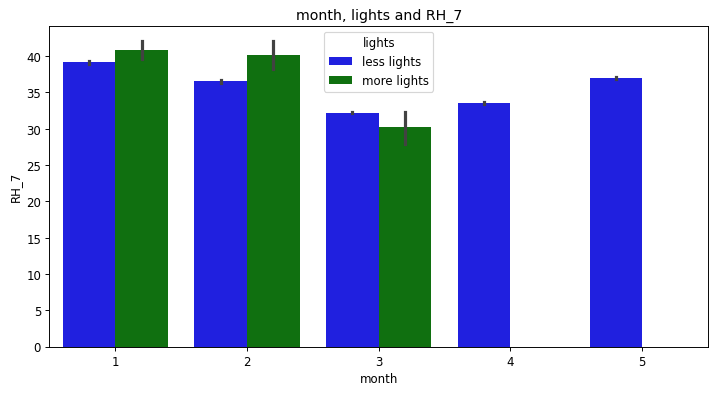

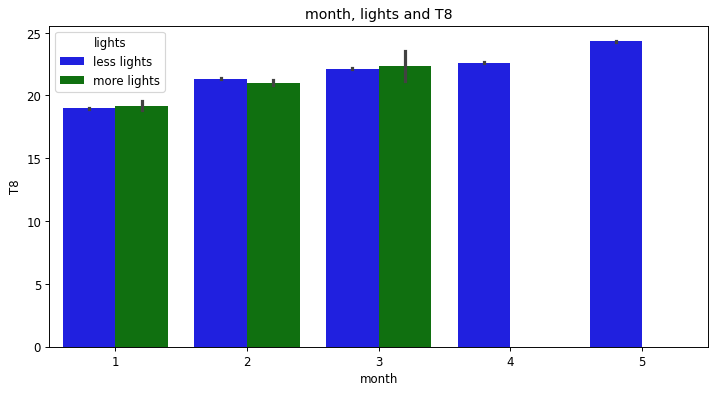

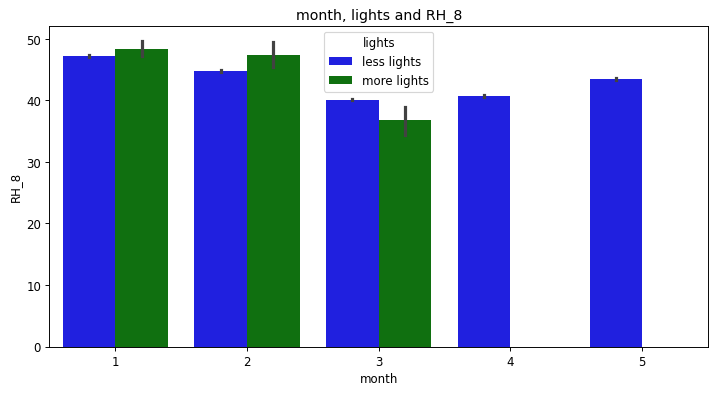

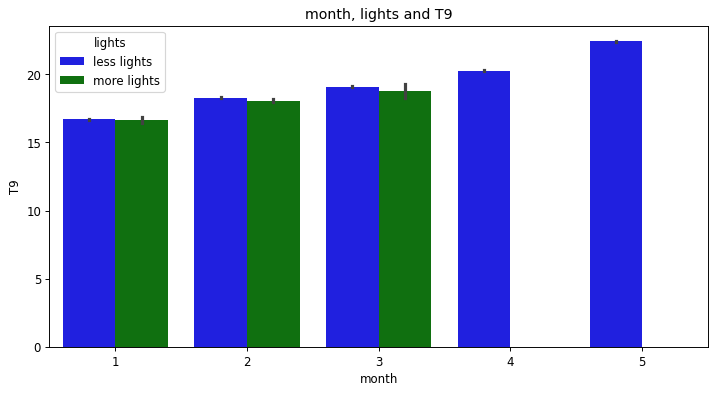

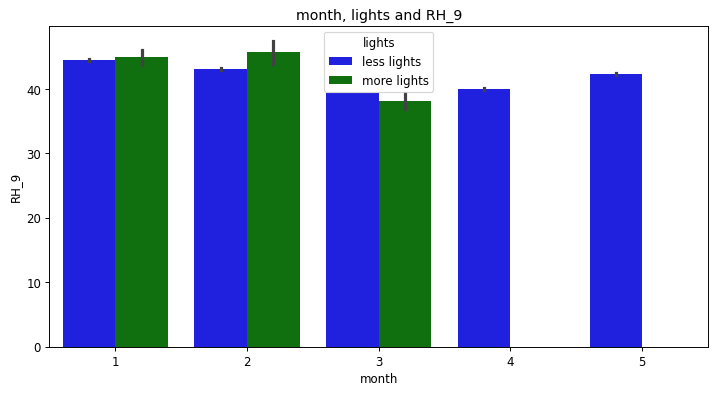

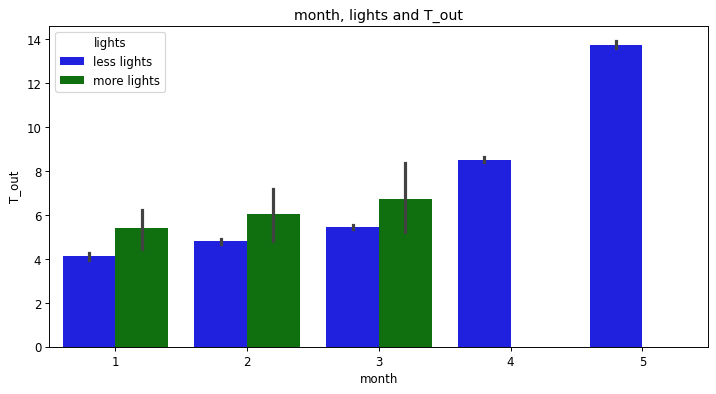

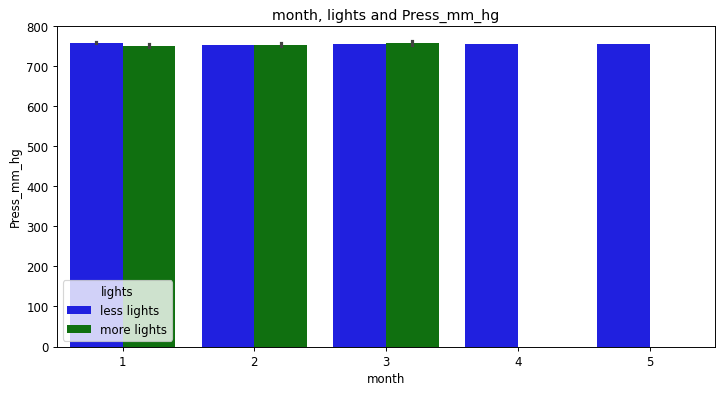

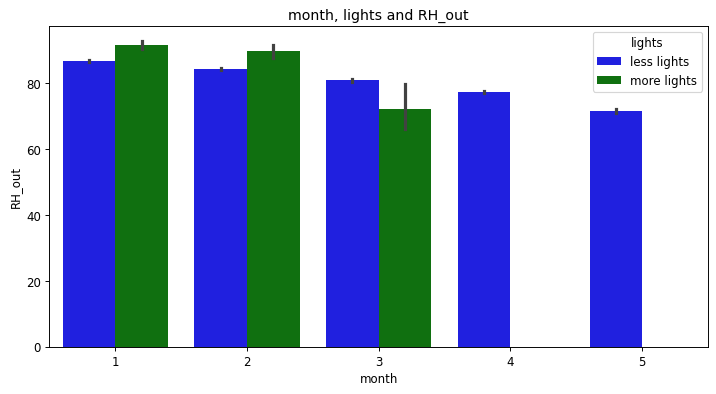

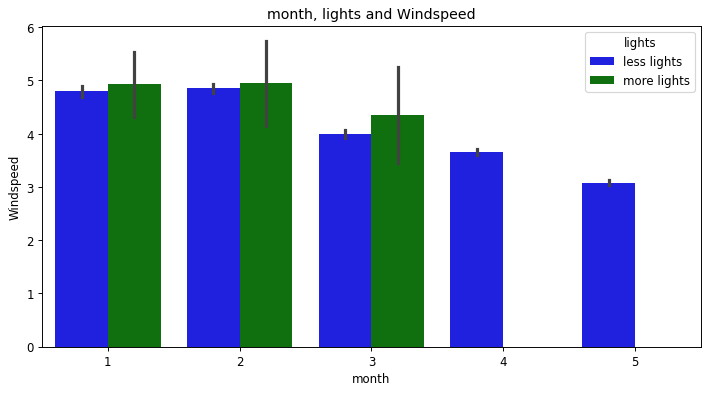

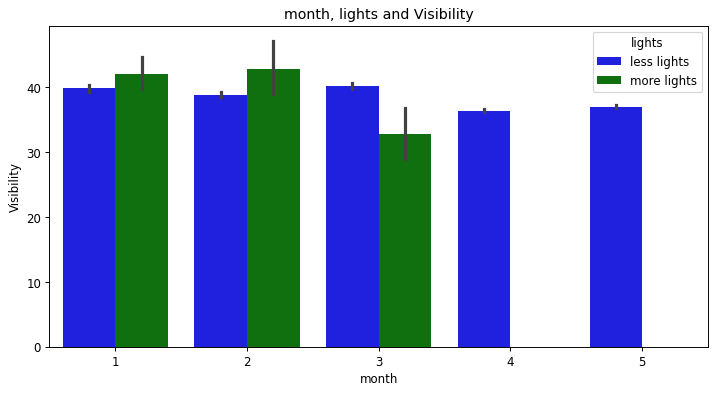

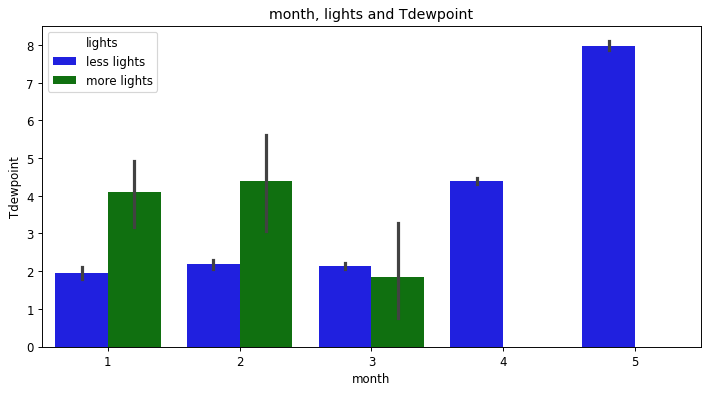

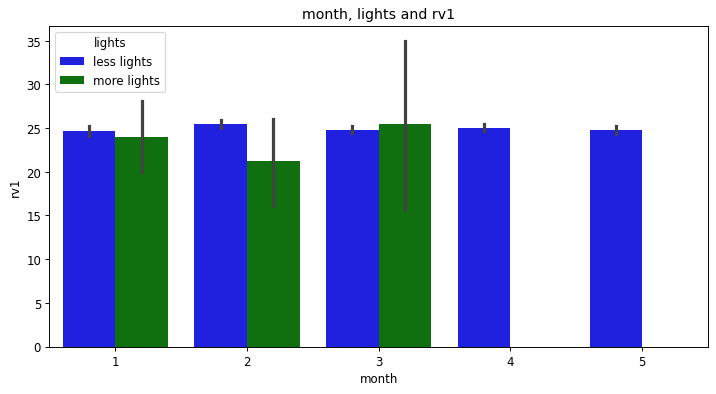

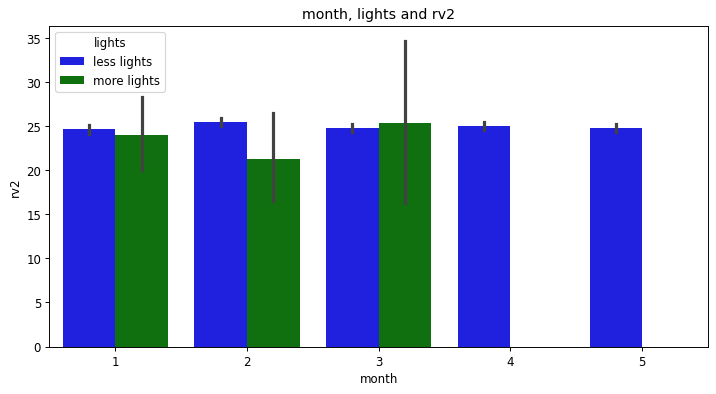

In [42]:
for i in data.drop(columns=['lights','Appliances','year','hour','day','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='month',y=i,hue='lights',data=data,palette=['blue','green'])
    plt.title('month, lights and {}'.format(i))

C:\Users\User\AppData\Local\Temp/ipykernel_15024/1444121927.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,5],dpi=85)


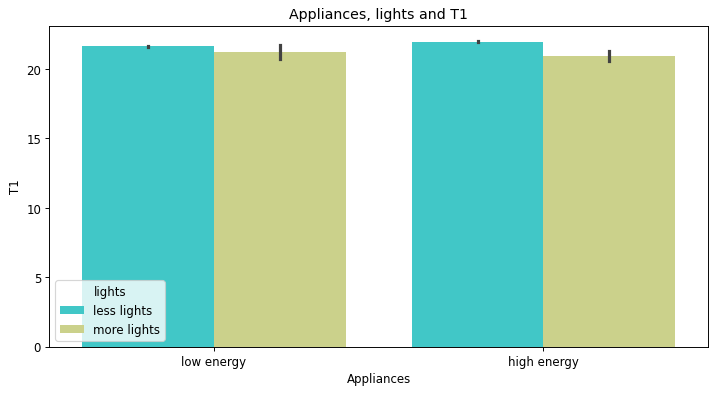

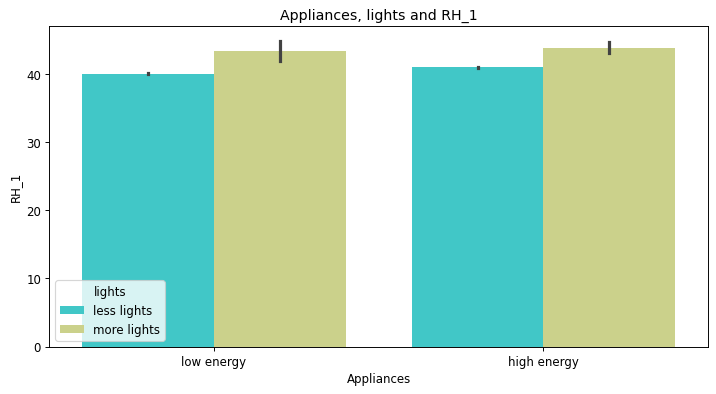

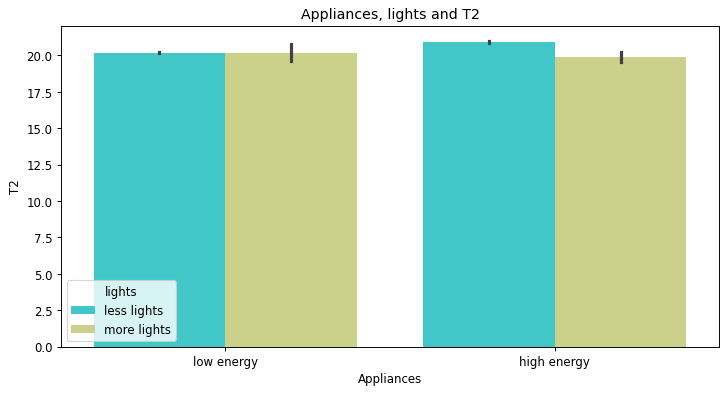

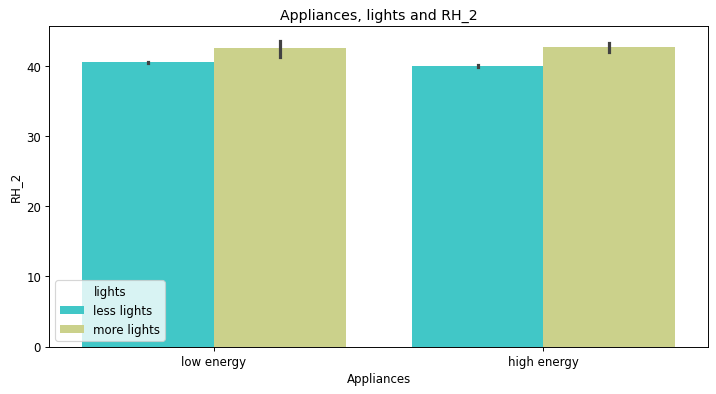

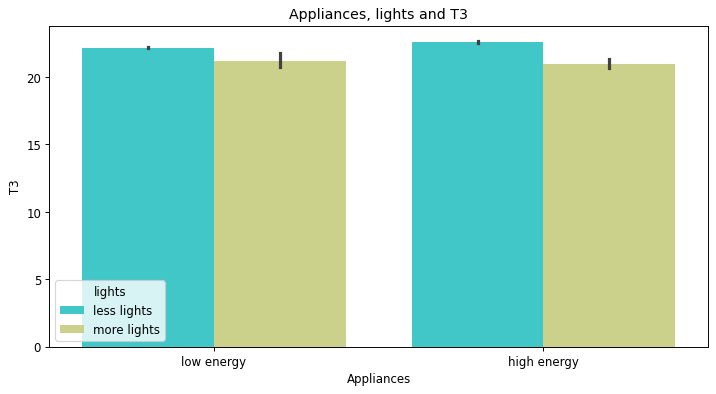

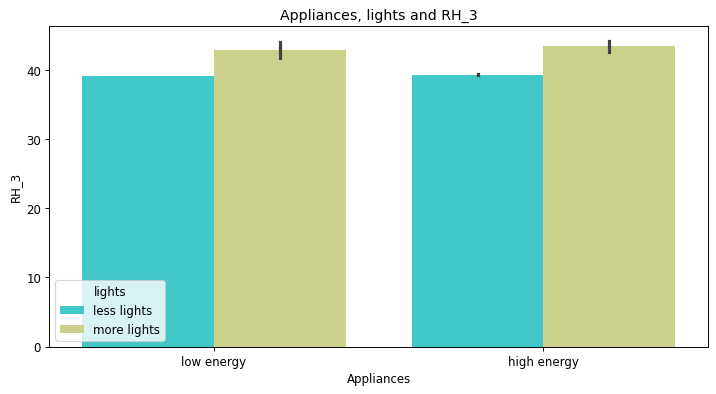

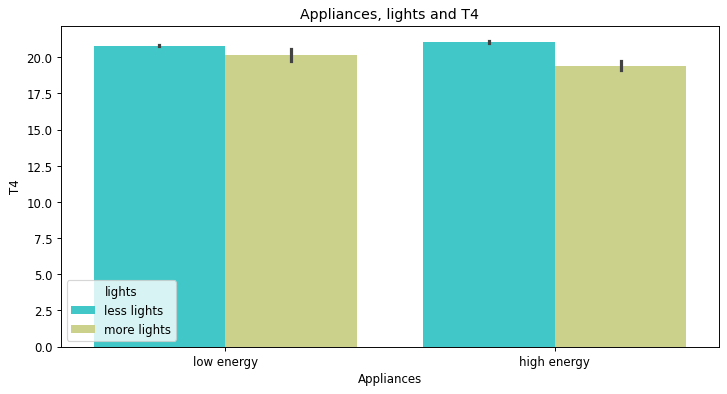

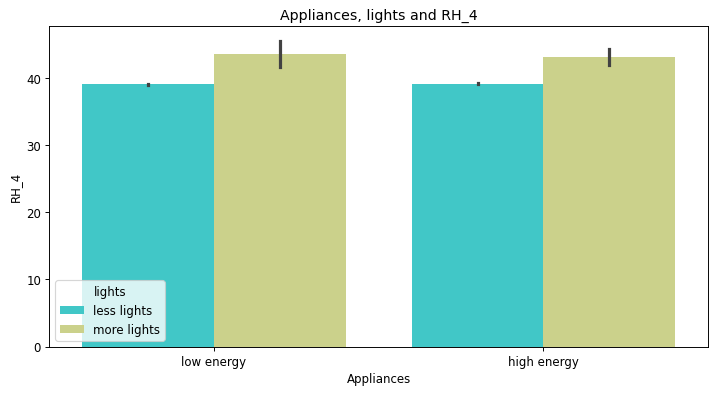

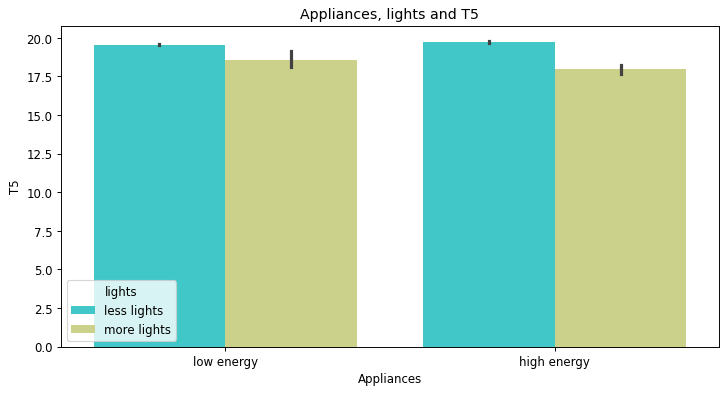

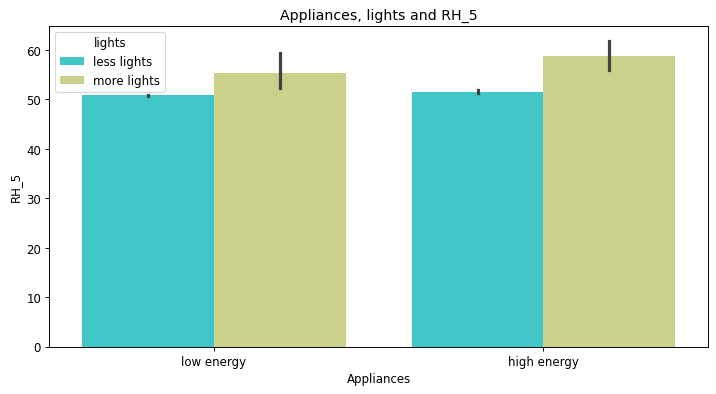

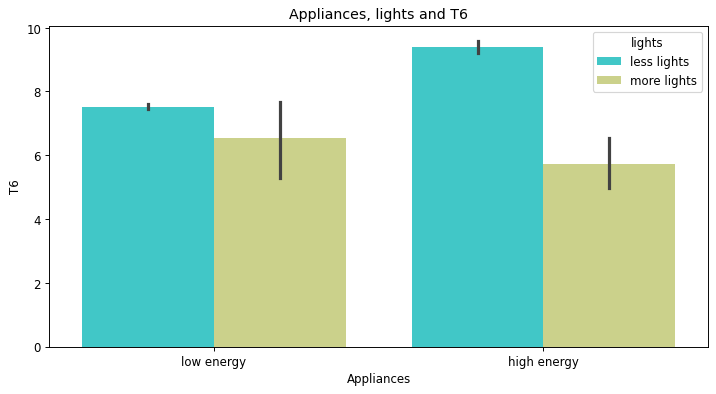

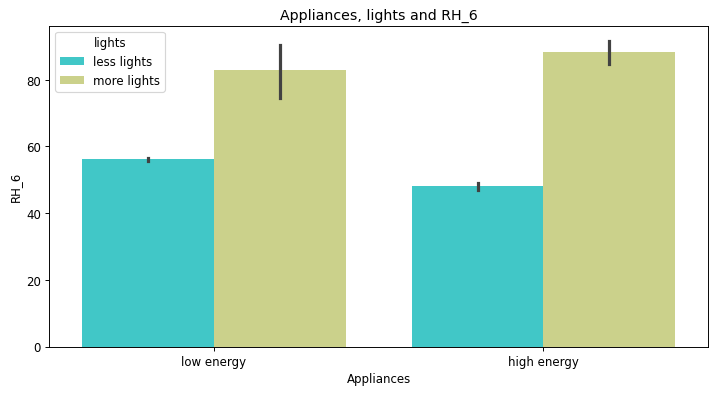

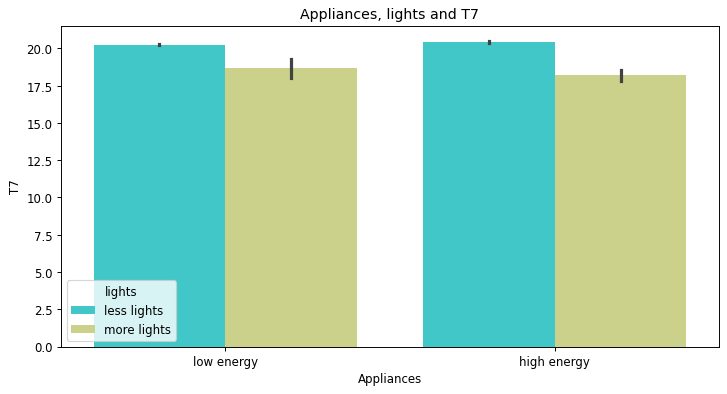

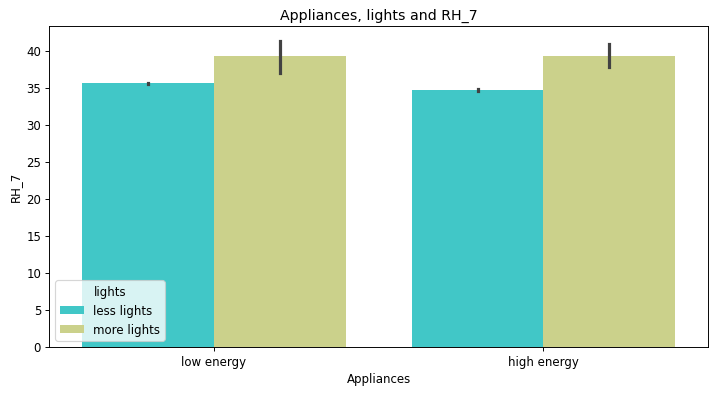

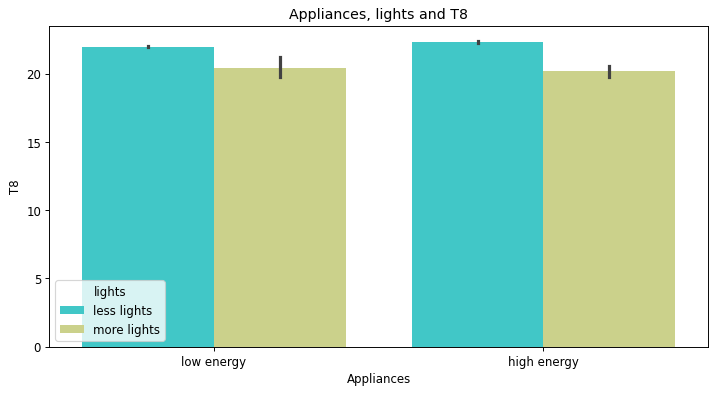

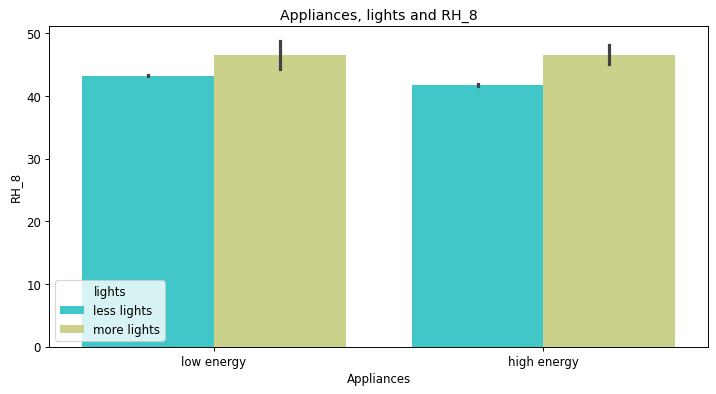

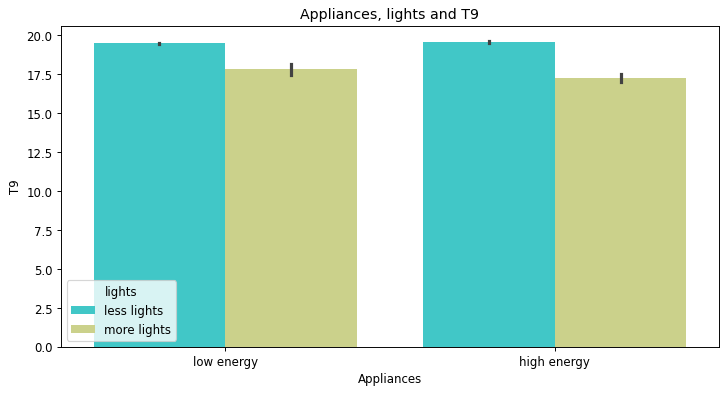

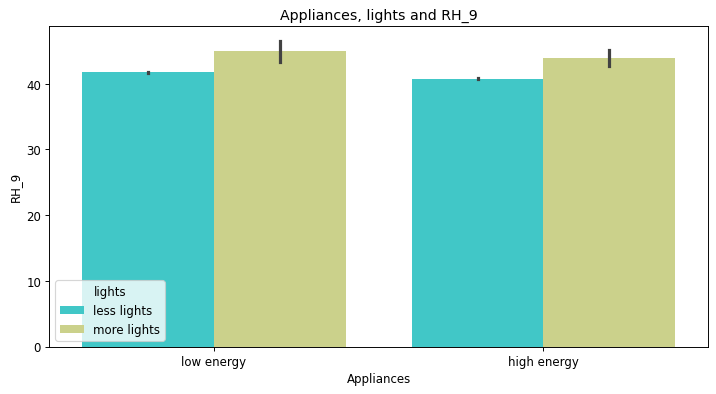

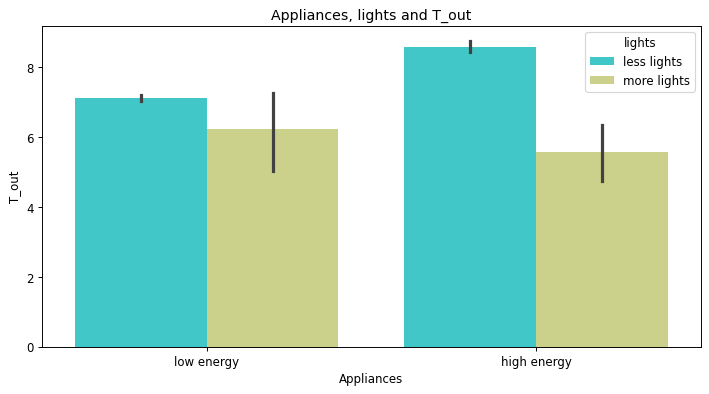

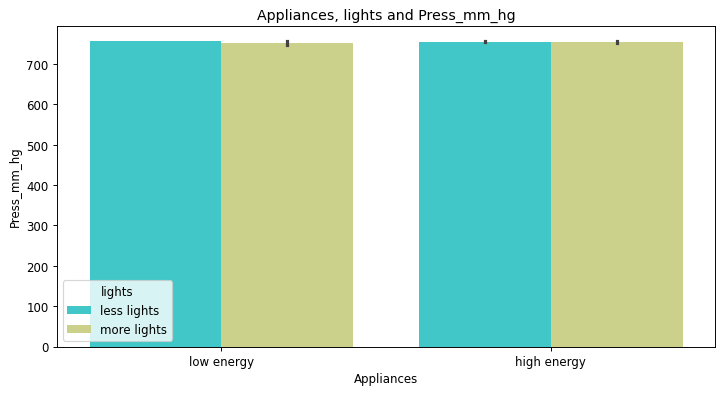

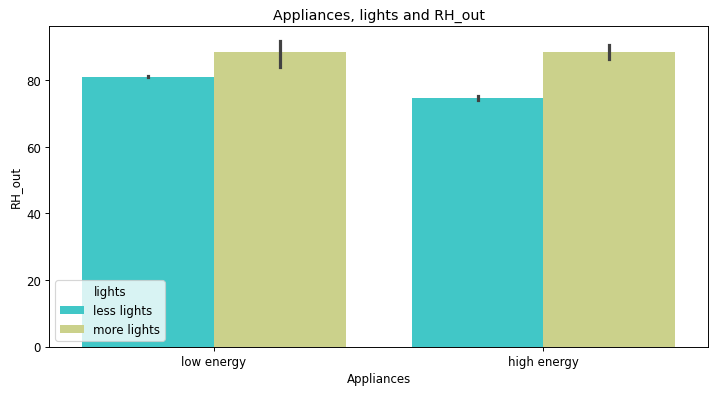

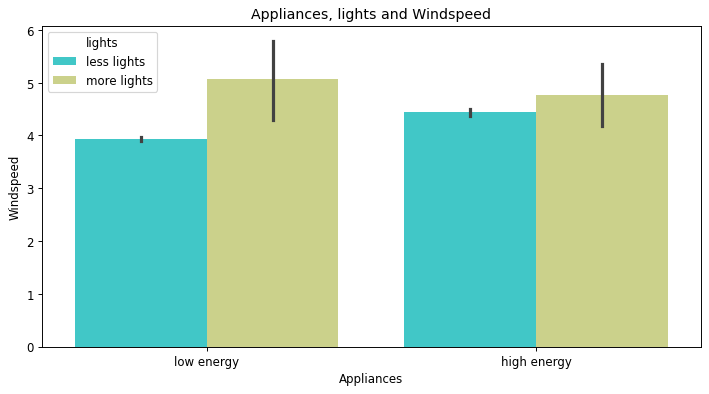

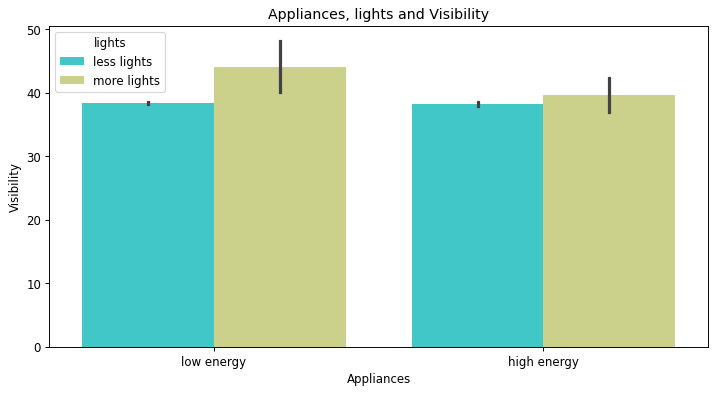

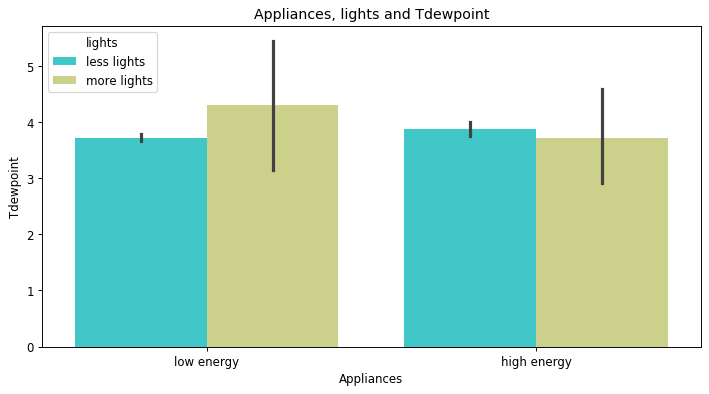

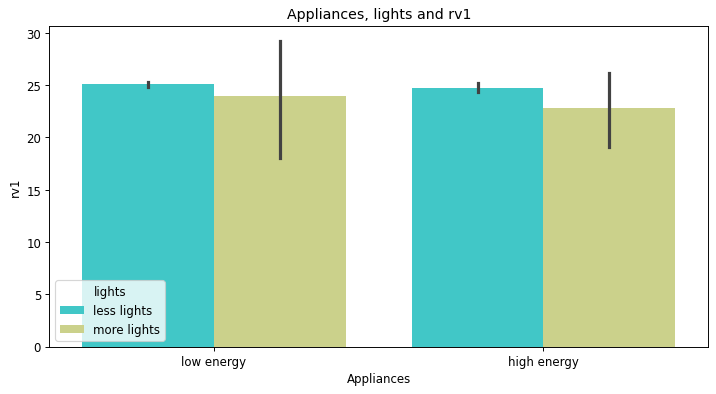

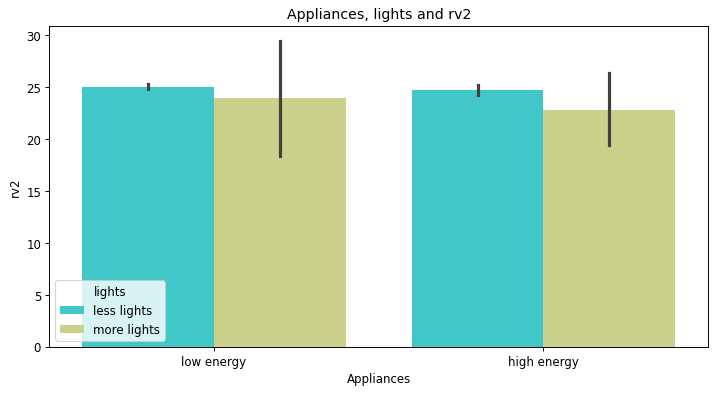

In [43]:
for i in data.drop(columns=['lights','Appliances','year','hour','day','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='Appliances',y=i,hue='lights',data=data,palette='rainbow')
    plt.title('Appliances, lights and {}'.format(i))

# Univariate Plots

C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

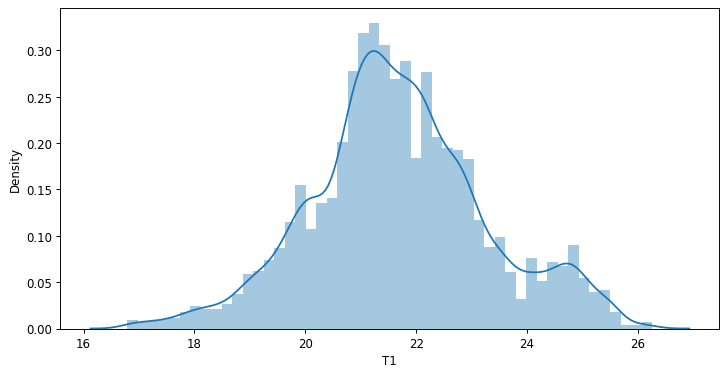

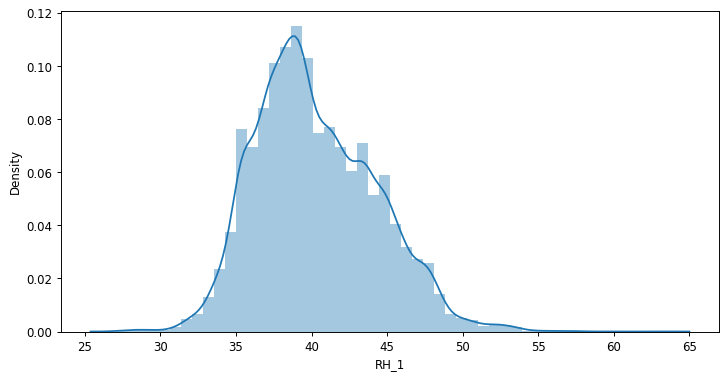

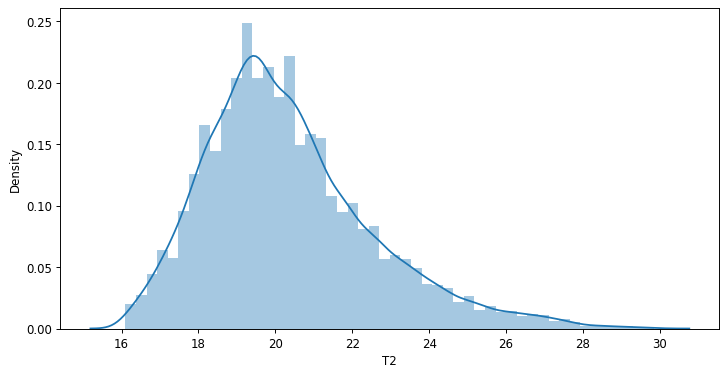

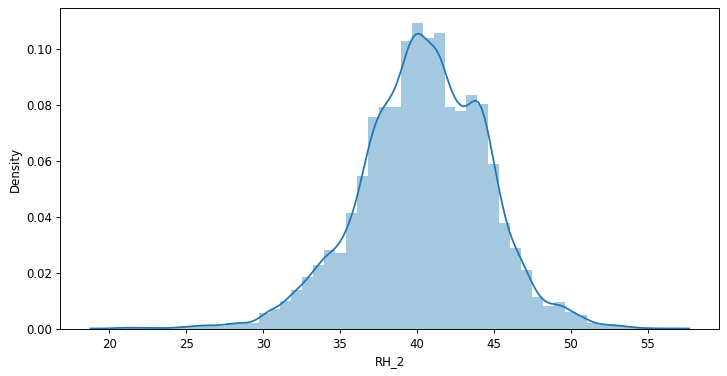

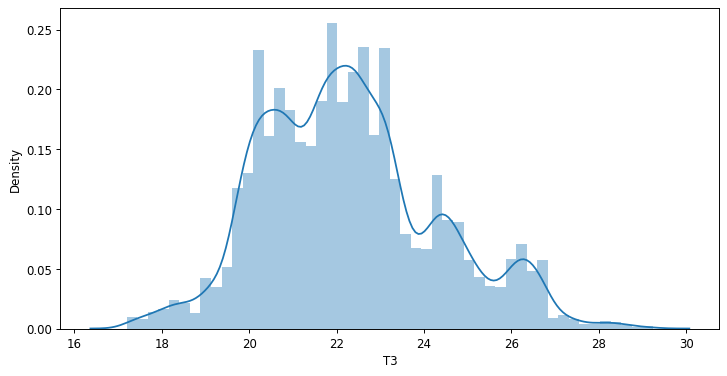

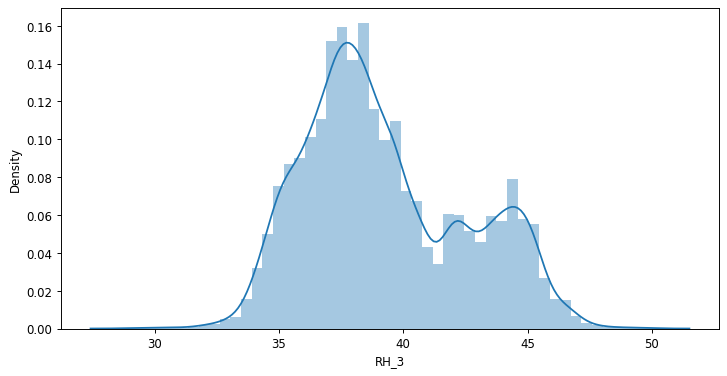

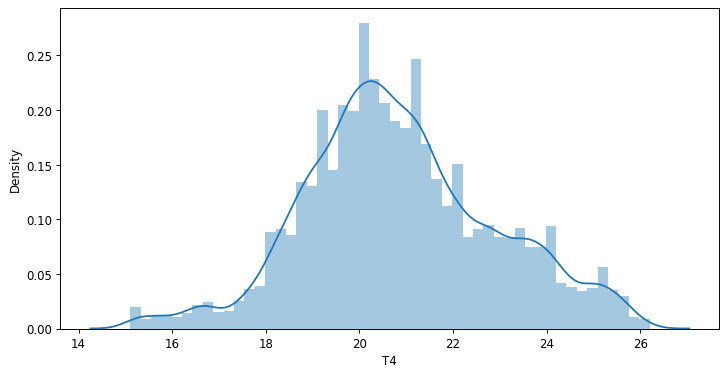

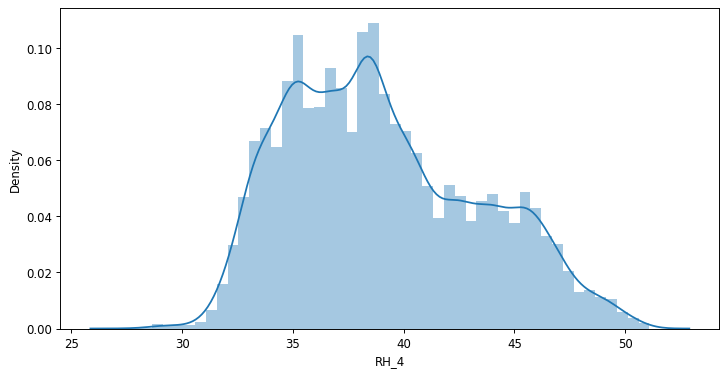

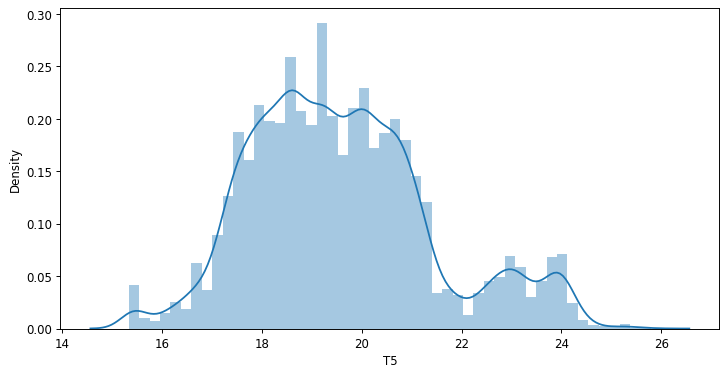

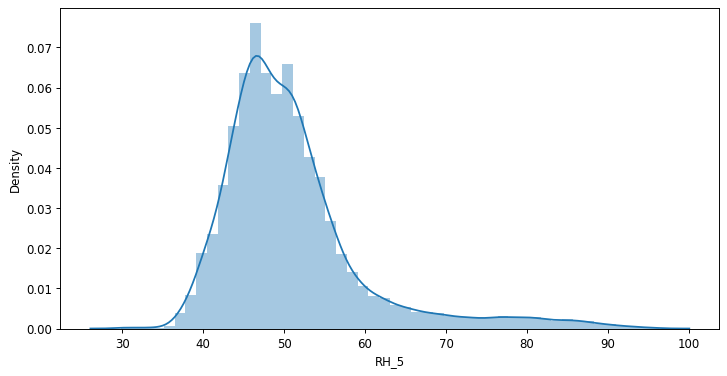

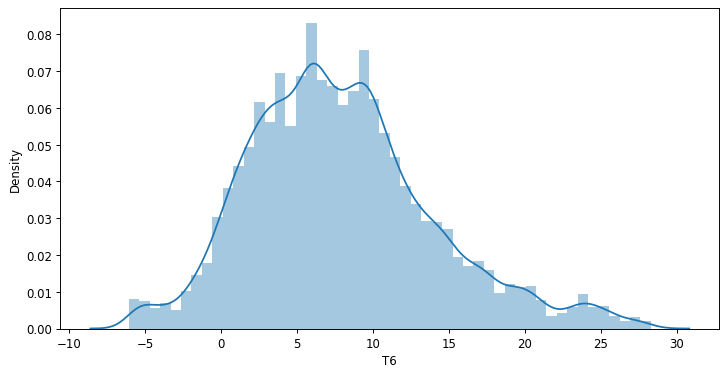

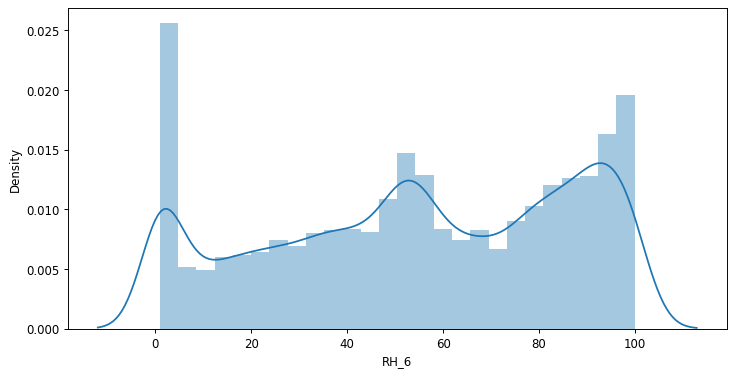

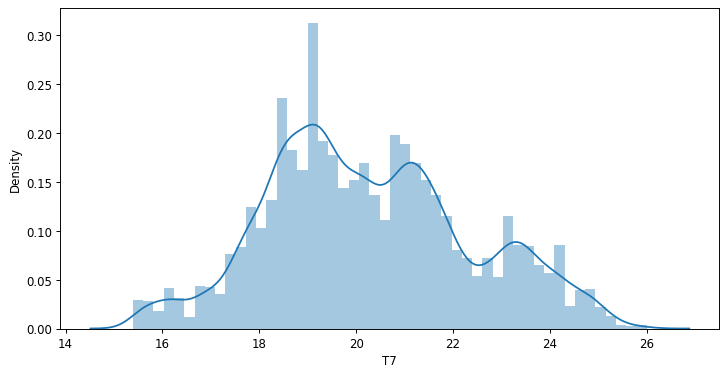

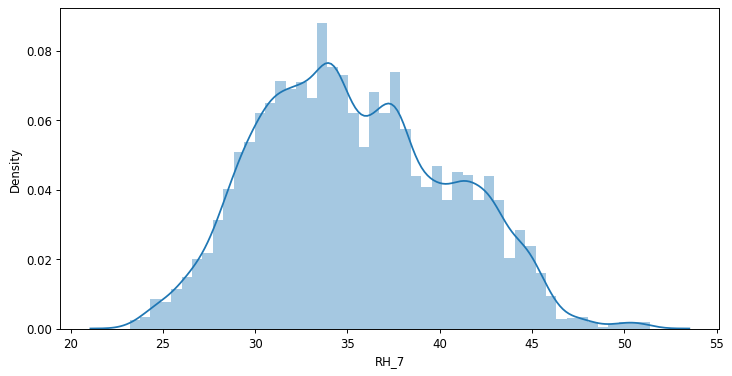

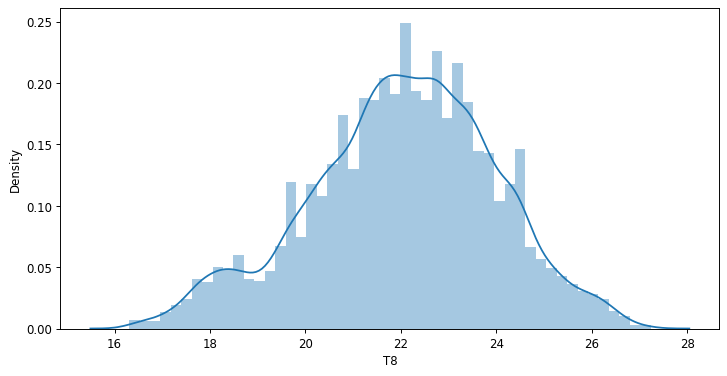

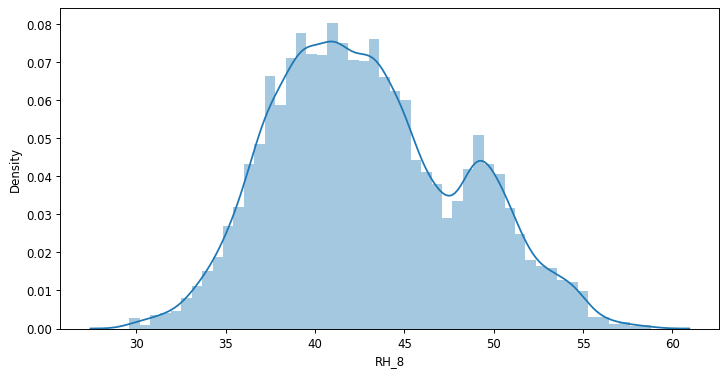

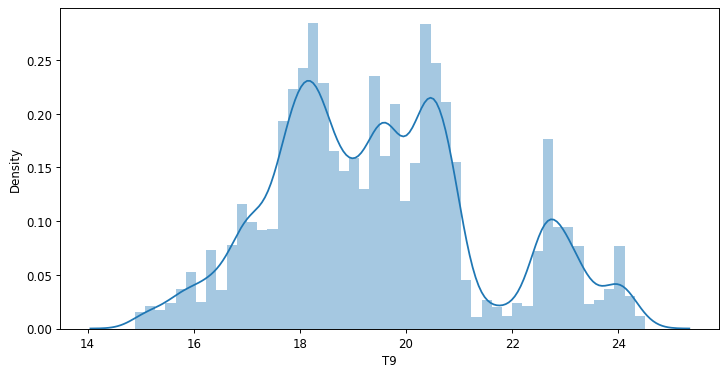

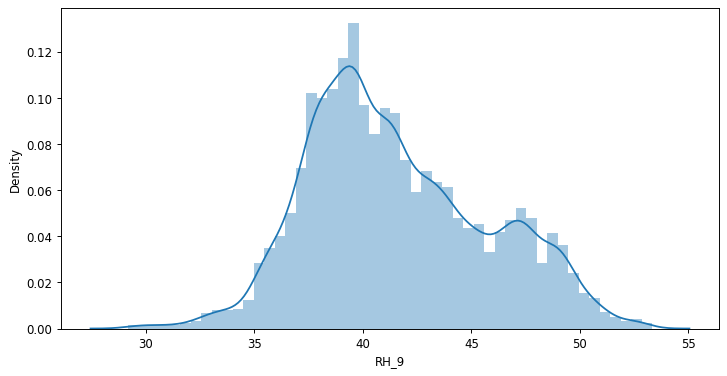

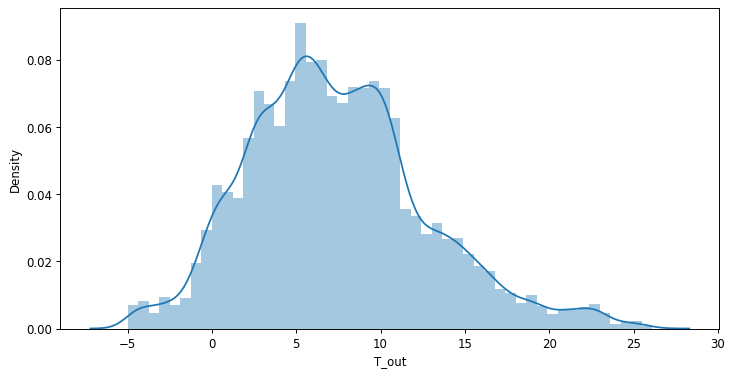

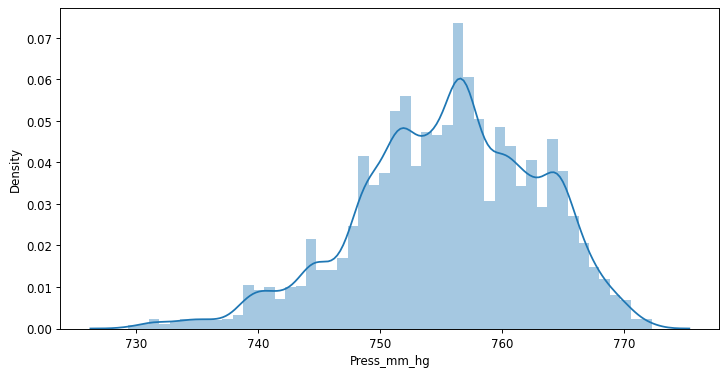

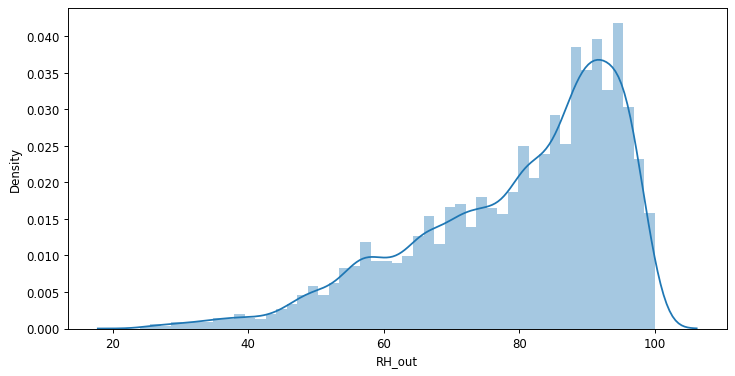

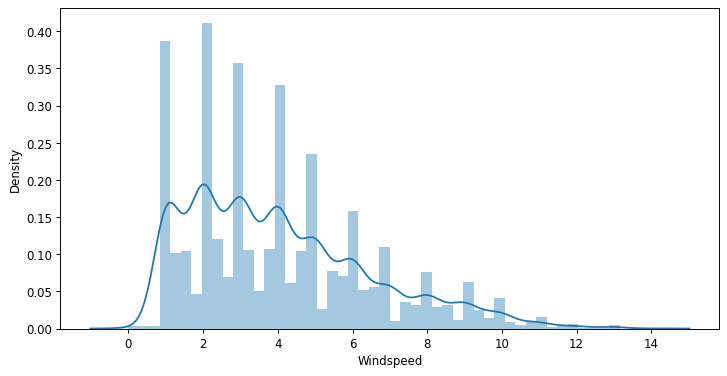

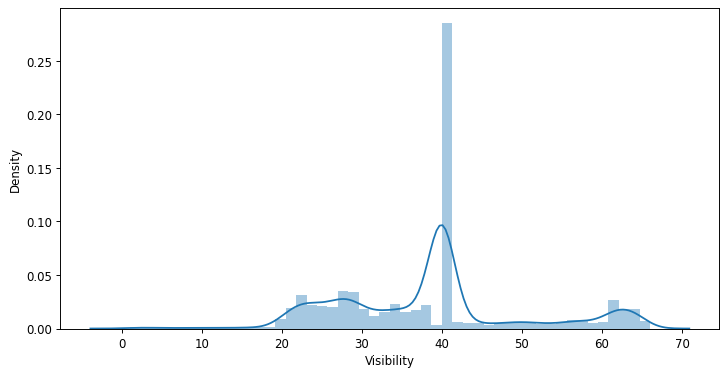

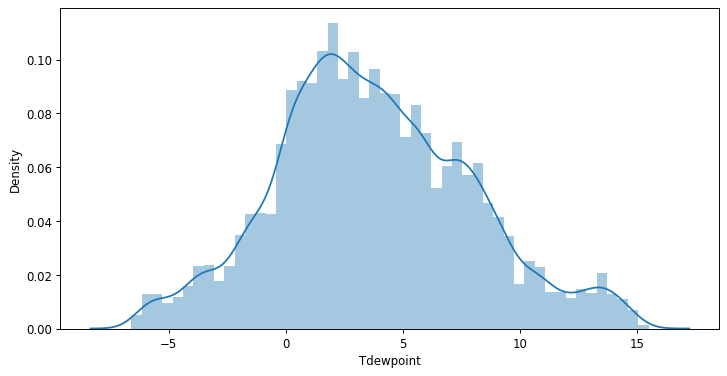

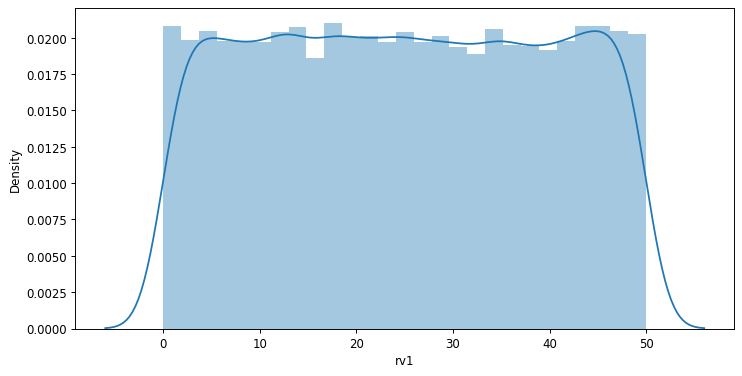

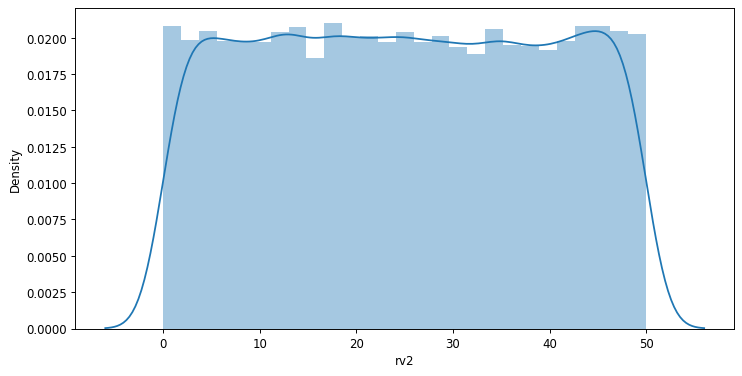

In [44]:
for i in data.drop(columns=['Appliances','lights','year','day','hour','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.distplot(data[i])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  object 
 1   lights       19735 non-null  object 
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [46]:
x=data.drop(columns=['Appliances','month','day','hour','year','lights'])
y=data.drop(columns=['lights'])['Appliances']

# Logistic regression

In [47]:
from sklearn.model_selection import train_test_split as tst

In [48]:
x_train,x_test,y_train,y_test=tst(x,y,test_size=0.3,random_state=101)

In [49]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13814, 26), (13814,), (5921, 26), (5921,))

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [52]:
lr=LR()
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.8125814391197336
Testing accuracy  : 0.8118561053876034


# confusion matrix

In [54]:
confusion_matrix(y_test,y_pred_test)

array([[ 366,  918],
       [ 196, 4441]], dtype=int64)

In [55]:
cr=classification_report(y_train,y_pred_train)

In [56]:
print(cr)

              precision    recall  f1-score   support

 high energy       0.64      0.27      0.38      2949
  low energy       0.83      0.96      0.89     10865

    accuracy                           0.81     13814
   macro avg       0.74      0.62      0.64     13814
weighted avg       0.79      0.81      0.78     13814



In [57]:
cr1=classification_report(y_test,y_pred_test)

In [58]:
print(cr1)

              precision    recall  f1-score   support

 high energy       0.65      0.29      0.40      1284
  low energy       0.83      0.96      0.89      4637

    accuracy                           0.81      5921
   macro avg       0.74      0.62      0.64      5921
weighted avg       0.79      0.81      0.78      5921



# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier  as dtc

In [60]:
dtc=dtc()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
dtc.score(x_train,y_train)

1.0

In [62]:
dtc.score(x_test,y_test)

0.8723188650565783

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier as knc

In [64]:
for i in range(1,5):
        neigh = knc(n_neighbors = i)
neigh.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [66]:
rfc=rfc()

In [67]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
print('training accuracy :',rfc.score(x_train,y_train))
print('testing accuracy : ',rfc.score(x_test,y_test))

training accuracy : 1.0
testing accuracy :  0.9057591623036649


In [69]:
y_pred_train=rfc.predict(x_train)
y_pred_test=rfc.predict(x_test)

In [70]:
cr=classification_report(y_train,y_pred_train)
cr1=classification_report(y_test,y_pred_test)
print(cr)
print(cr1)

              precision    recall  f1-score   support

 high energy       1.00      1.00      1.00      2949
  low energy       1.00      1.00      1.00     10865

    accuracy                           1.00     13814
   macro avg       1.00      1.00      1.00     13814
weighted avg       1.00      1.00      1.00     13814

              precision    recall  f1-score   support

 high energy       0.83      0.71      0.77      1284
  low energy       0.92      0.96      0.94      4637

    accuracy                           0.91      5921
   macro avg       0.88      0.84      0.85      5921
weighted avg       0.90      0.91      0.90      5921



# Svm

In [71]:
from sklearn.svm import SVC

In [72]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [73]:
print('training accuracy:',svc.score(x_train,y_train))
print('testing accuracy:',svc.score(x_test,y_test))

training accuracy: 0.8531924134935572
testing accuracy: 0.8400608005404493


In [74]:
y_pred_train=svc.predict(x_train)
y_pred_test=svc.predict(x_test)

In [75]:
cr3=classification_report(y_pred_train,y_train)
cr4=classification_report(y_pred_test,y_test)

In [76]:
print(cr3)
print(cr4)

              precision    recall  f1-score   support

 high energy       0.40      0.81      0.54      1465
  low energy       0.97      0.86      0.91     12349

    accuracy                           0.85     13814
   macro avg       0.69      0.84      0.73     13814
weighted avg       0.91      0.85      0.87     13814

              precision    recall  f1-score   support

 high energy       0.37      0.77      0.50       615
  low energy       0.97      0.85      0.90      5306

    accuracy                           0.84      5921
   macro avg       0.67      0.81      0.70      5921
weighted avg       0.91      0.84      0.86      5921



Text(0.5, 1.0, 'Visualization important featureas')

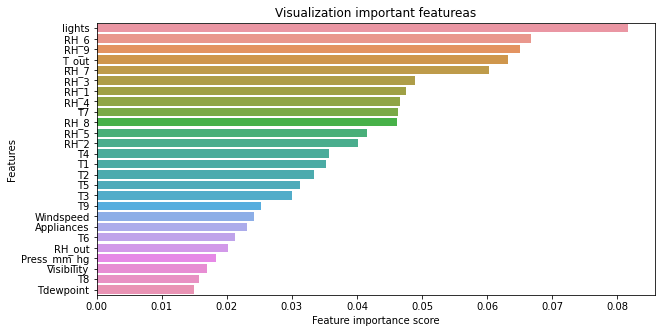

In [79]:
importance=dtc.feature_importances_
feature_imp=pd.Series(importance,index=data.columns[:26]).sort_values(ascending=False)
feature_imp
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Visualization important featureas')